In [1]:
import warnings

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module=r"squidpy\.pl\._spatial_utils"
)

In [2]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import seaborn as sns
import pickle
from collections import OrderedDict  




 

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig4"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# dotplot of expression

In [4]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered.scrna"

PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata=sc.read_h5ad(PATH2)
 
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

 


In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [6]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"

PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
CATEGORY="lvl5_annotation"

In [8]:
adata=adata[adata.obs[CATEGORY].str.startswith("KC")].copy()


# Show full plot with original names to not conceal high expression in small population

In [11]:
ORDER=[ 'KC_Sebocyte_DuctOuter',
       'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_GlandInner',
 'KC_Sebocyte_GlandBasal',

 'KC_other']

ORDER2 = ['KC1',
 'KC2',
 'KC3',
 'KC4',
 'KC5',
           'KC_other',
 'KC_HF: HFSC',
           'KC_HF: SPON2+',
           'KC_HF: ORS',
 'KC_HF: ORS_junction',
 'KC_HF: IRS',
 'KC_HF: IRS_Cuticle',
           'KC_HF: HS',
 'KC_HF: Matrix',
 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_DuctInner',
           'KC_Sebocyte_DuctInner_Junction',


 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner',
]

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


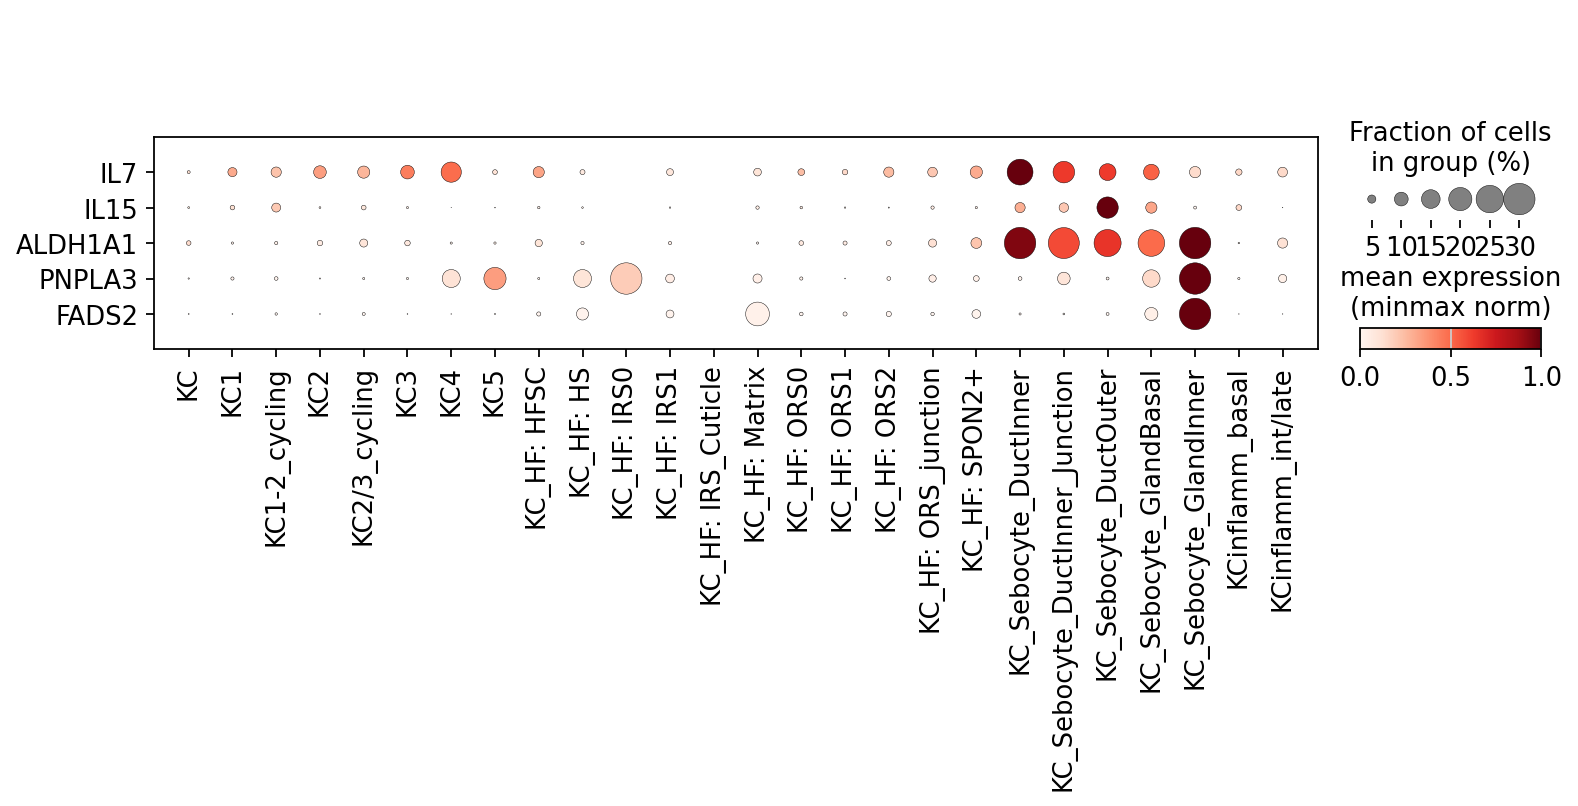

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


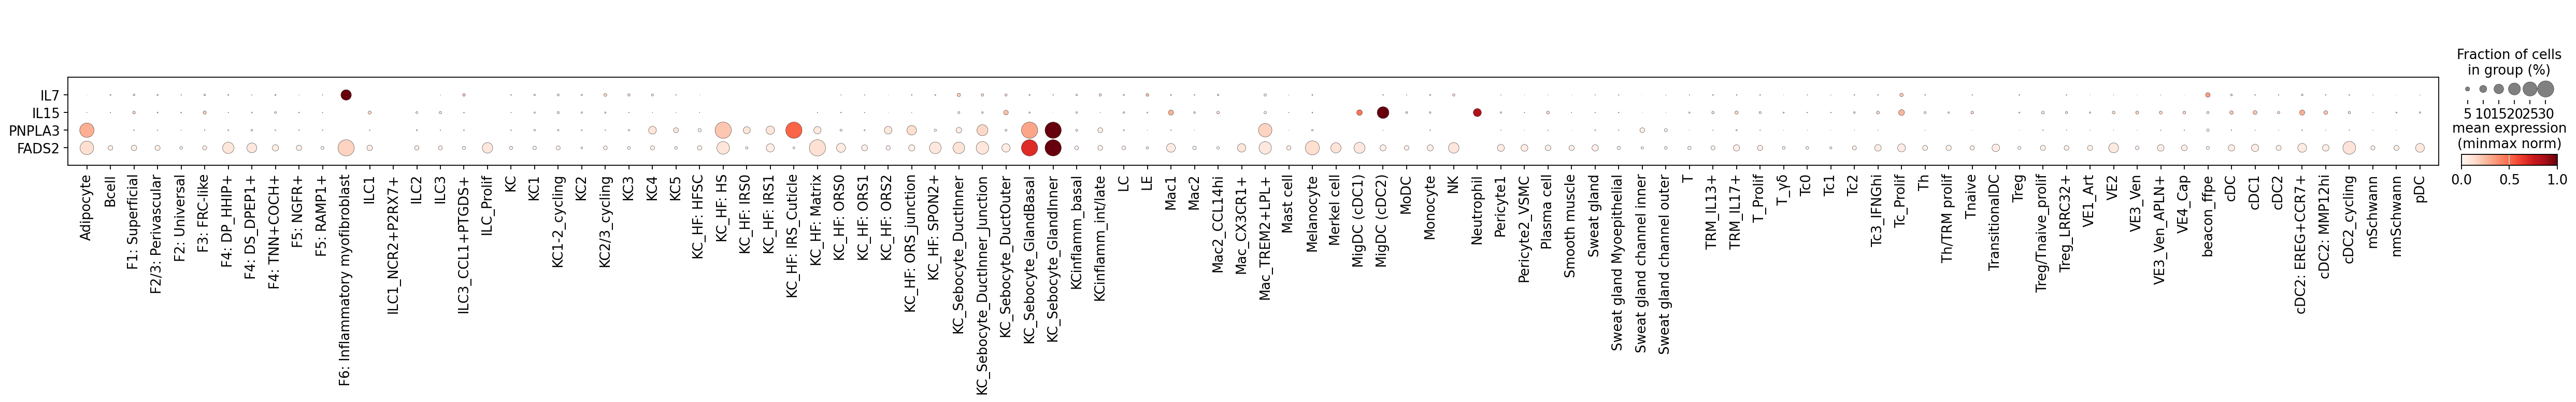

In [13]:
SUMMARY_LIST = sum(SUMMARY.values(), [])
sc.pl.dotplot(
    adata,
    SUMMARY_LIST,
  groupby="lvl5_annotation",    standard_scale="var",
    dendrogram=False,
    colorbar_title="mean expression\n(minmax norm)",
       # save="retinoic_dotplot_scrna_list.pdf"

    dot_max=0.5,
    swap_axes=True,
) 
sc.pl.dotplot(
    adata_5k ,
    remove_markers(SUMMARY_LIST),
  groupby="lvl5_annotation",    standard_scale="var",
    dendrogram=False,
    colorbar_title="mean expression\n(minmax norm)",
       # save="retinoic_dotplot_scrna_list.pdf"

    dot_max=0.5,
    swap_axes=True,
) 


# Simplify names to make dotplot smaller

In [14]:
RENAME = {'KC': 'KC_other',
 'KC1': 'KC1',
 'KC1-2_cycling': 'KC_other',
 'KC2': 'KC2',
 'KC2/3_cycling': 'KC_other',
          
 'KC3': 'KC3',
 'KC4': 'KC4',
 'KC5': 'KC5',
 'KC_HF: HFSC': 'KC_HF: HFSC',
 'KC_HF: HS': 'KC_HF: HS',
 'KC_HF: IRS0': 'KC_HF: IRS',
 'KC_HF: IRS1': 'KC_HF: IRS',
 'KC_HF: IRS_Cuticle': 'KC_HF: IRS_Cuticle',
 'KC_HF: Matrix': 'KC_HF: Matrix',
 'KC_HF: ORS0': 'KC_HF: ORS',
 'KC_HF: ORS1': 'KC_HF: ORS',
 'KC_HF: ORS2': 'KC_HF: ORS',
 'KC_HF: ORS_junction': 'KC_HF: ORS_junction',
 'KC_HF: SPON2+': 'KC_HF: SPON2+',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal': 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner': 'KC_Sebocyte_GlandInner',
 'KCinflamm_basal': 'KC_other',
 'KCinflamm_int/late': 'KC_other'}
adata.obs["tmp"]=adata.obs["lvl5_annotation"].map(RENAME)
adata_5k.obs["tmp"]=adata_5k.obs["lvl5_annotation"].map(RENAME)

CATEGORY='tmp'
adata = adata[~adata.obs["tmp"].isna()].copy()

In [15]:
desired_order = [
        'KC1', 'KC2', 'KC1-2_cycling', 'KC1/2', 
   # 'KC1', 'KC1/2', 'KC1/2_cycling', 'KC1-2_cycling',
   # 'KC2',
    'KC2/3_cycling', 'KC3', 'KC4', 'KC5',
    'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
    'KCinflamm_int/late', 'KCinflamm_cycling',
    
 'KC_HF: HFSC',
   'KC_HF: SPON2+',
    'KC_HF: Basal_LGR5+', 'KC_HF: Basal LGR5+','KC_HF: ORS-Bulb/infundibulum', 
    
    'KC_HF: Basal_NPNT+', 'KC_HF: ORS-0', 'KC_HF: ORS0','KC_HF: ORS',
    'KC_HF: ORS1', 'KC_HF: ORS2',   'KC_HF: ORS2i', 'KC_HF: ORS 1/2',
    'KC_HF: ORS1/2', 'KC: HF ORS1/2', 'KC_HF: ORS_cycling',
    'KC_HF: ORS/CL', 'KC_HF_CL',
      'KC_HF: IRS0',    'KC_HF: IRS1',

    'KC_HF: IRS+HS', 'KC_HF_IRS/HS',   'KC_HF: IRS_Cuticle', 'KC_HF: IRS',
       'KC_HF: IRS_Sebo_doublet?',
    'KC_HF: IRS_cycling', 'KC_HF: IRS_TCHH+',
    'KC_HF: HS', 'KC_HF: HS1',  'KC_HF_cycling',  'KC_HF: Matrix', 
    'KCinflamm_Sebocyte_basal', 'KC_Sebocyte_basal',
    'KC_Sebocyte_duct_basal/outer', 'KC_SebocyteDuct_Outer',
    'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer-LOWQ',
    'KC*_Sebocyte',
    'KC_Sebocyte_inner', 'KC_Sebocyte_inner2',
    'KC_Sebocyte_inner1', 

      'KC_Sebocyte_DuctOuter',
      'KC_Sebocyte_DuctInner', 
    'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner',
    'KC_SebocyteDuct_Outer/HF_Junction',
    'KC_SebocyteDuct_Outer/HF_junction2','KC_SebocyteDuct_Outer/HF_junction', 
 'KC_Sebocyte_DuctInner_Junction',
 'KC_HF: ORS_junction', 
     'KC_Sebocyte_GlandBasal',
    'KC_Sebocyte_PPARG+_basal', 'KC_SebocyteGland_Outer','KC_SebocyteGland_outer',
    'KC_Sebocyte_PPARG+_basal_cycling',
    'KC_Sebocyte_PPARG+_basal/outer', 'KC_Sebocyte_int',
    'KChf/cycling/ KC_Sebocyte_PPARG+_inner','KC_Sebocyte_cycling',
      'KC_Sebocyte_GlandInner',
    'Sweat gland channel outer', 'Sweat gland channel cycling',
    'Sweat gland channel inner', 'Sweat gland',
    'KC_SC: LGR6+ACTA2+', 'Sweat gland Myoepithelial',
    'Sweat gland myoepithelial',
    'KC/lowq_mastcell', 'KC_cycling/Mac_doublet',
    'KC/lowq_melanocyte/T', 'KC*', 'KC_Outlier?',
    'KC/lowq_mac_doublet', 'Sweat gland_plasma doublet',
    'KChf_cycling', 'Sweat gland_cycling',
    "missing",
'KC',
    'KC_other', 'KC_cycling', 
    
    
    






]

# ------------------------------------------------------------------
# 2.  Remove duplicates *without* changing order
# ------------------------------------------------------------------
desired_order = list(dict.fromkeys(desired_order))  # or OrderedDict.fromkeys

# ------------------------------------------------------------------
# 3.  Ensure column is categorical
# ------------------------------------------------------------------
if not pd.api.types.is_categorical_dtype(adata.obs[CATEGORY]):
    adata.obs[CATEGORY] = adata.obs[CATEGORY].astype("category")

# ------------------------------------------------------------------
# 4.  Sanity-check: all data labels must be in desired_order
# ------------------------------------------------------------------
missing_labels = set(adata.obs[CATEGORY].unique()) - set(desired_order)
if missing_labels:
    raise ValueError(f"Labels present in data but missing from desired_order:\n{missing_labels}")

# ------------------------------------------------------------------
# 5.  Apply the ordering and drop unused categories
# ------------------------------------------------------------------
adata.obs[CATEGORY] = pd.Categorical(
    adata.obs[CATEGORY],
    categories=desired_order,
    ordered=True,
)
adata.obs[CATEGORY] = adata.obs[CATEGORY].cat.remove_unused_categories()



/tmp/ipykernel_3038641/1224848888.py:73: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata.obs[CATEGORY]):


In [16]:
RENAME = {'KC':  'KC_other',
 'KC1':  'KC_other',
 'KC1-2_cycling': 'KC_other',
 'KC2':  'KC_other',
          'KC_cycling': 'KC_other',
 'KC2/3_cycling': 'KC_other',
          
 'KC3':  'KC_other',
 'KC4': 'KC_other',
 'KC5':  'KC_other',
 'KC_HF: HFSC': 'KC_other',
 'KC_HF: HS': 'KC_other',
 'KC_HF: IRS0': 'KC_other',
 'KC_HF: IRS1': 'KC_other',
 'KC_HF: IRS_Cuticle': 'KC_other',
 'KC_HF: Matrix': 'KC_other',
 'KC_HF: ORS0':  'KC_other',
 'KC_HF: ORS1':  'KC_other',
 'KC_HF: ORS2': 'KC_other',
 'KC_HF: ORS_junction':  'KC_other',
 'KC_HF: SPON2+': 'KC_other',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal': 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner': 'KC_Sebocyte_GlandInner',
 'KCinflamm_basal': 'KC_other',
 'KCinflamm_int/late': 'KC_other'}
adata.obs["tmp2"]=adata.obs["lvl5_annotation"].map(RENAME)
adata_5k.obs["tmp2"]=adata_5k.obs["lvl5_annotation"].map(RENAME)

#adata.obs["tmp"].value_counts()

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


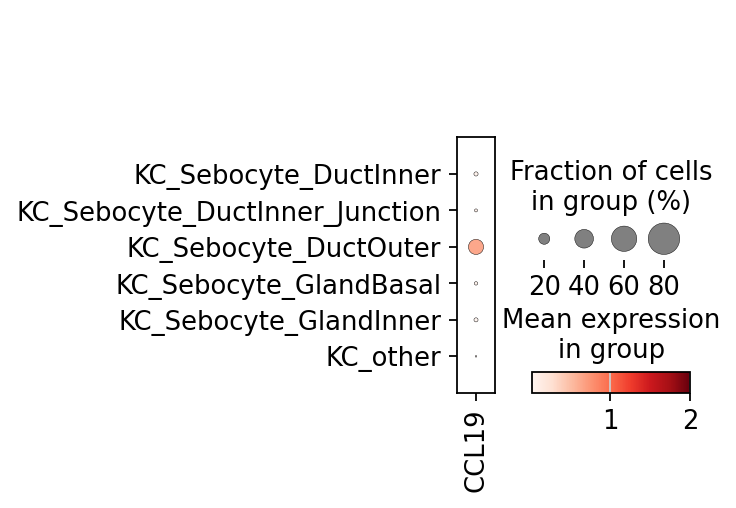

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


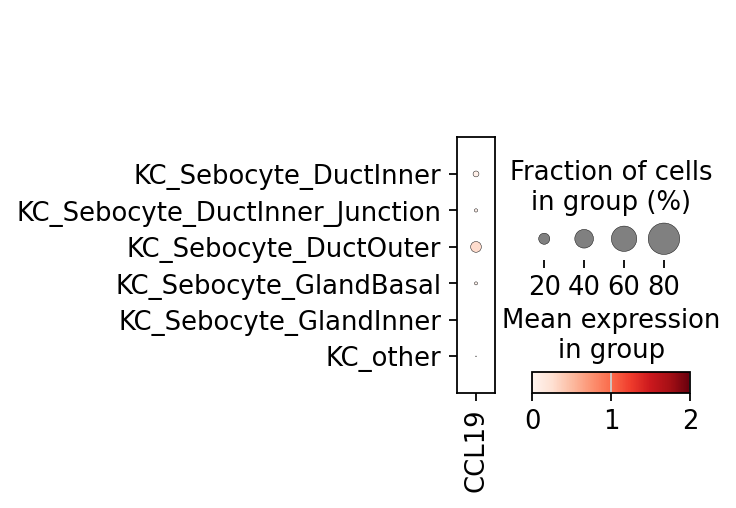

In [17]:
for x in ["Lesional", "Nonlesional"]:
    sc.pl.dotplot(adata[adata.obs["Site_status"]==x],#,[adata_sebocytes.obs["Site_status"]==x], 
                  ["CCL19"],
                  groupby="tmp2",
                  dendrogram=False, 
                    #standard_scale="var",
                  dot_max=0.8,
                  vmax=2
                   )

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


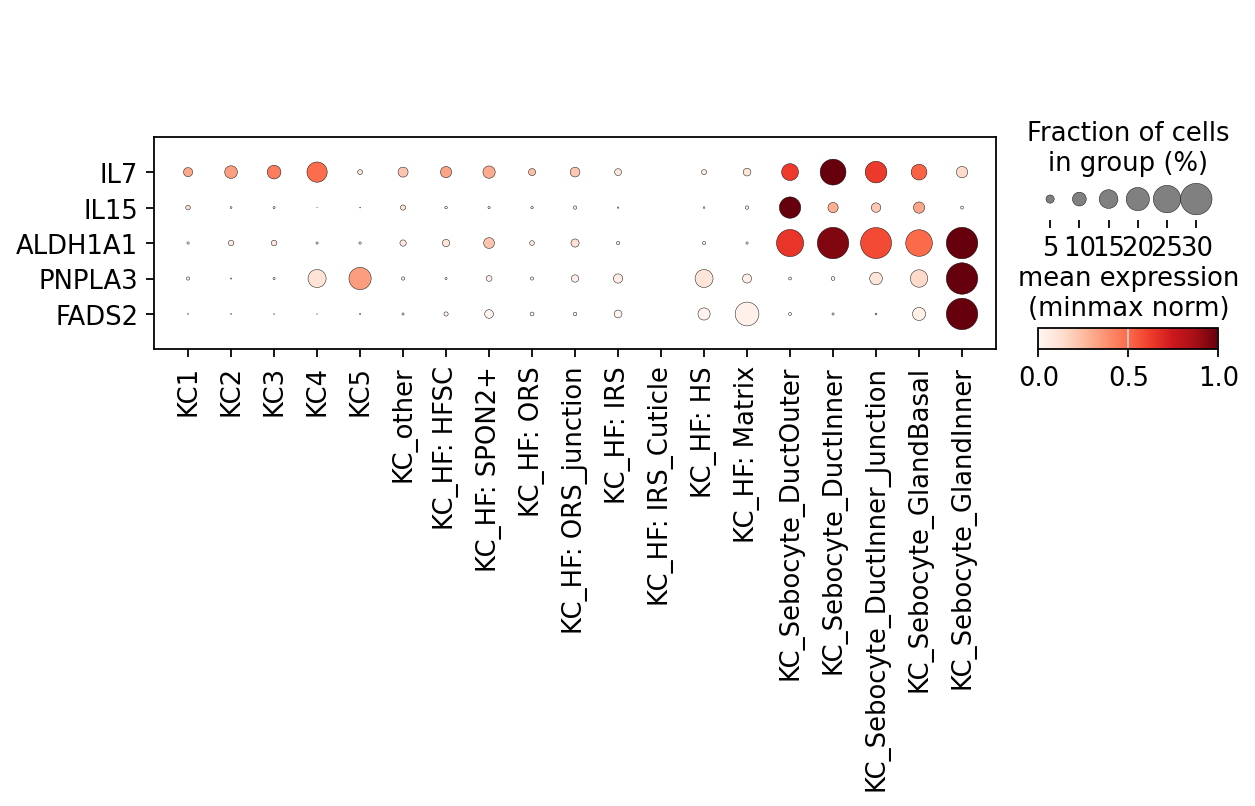

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


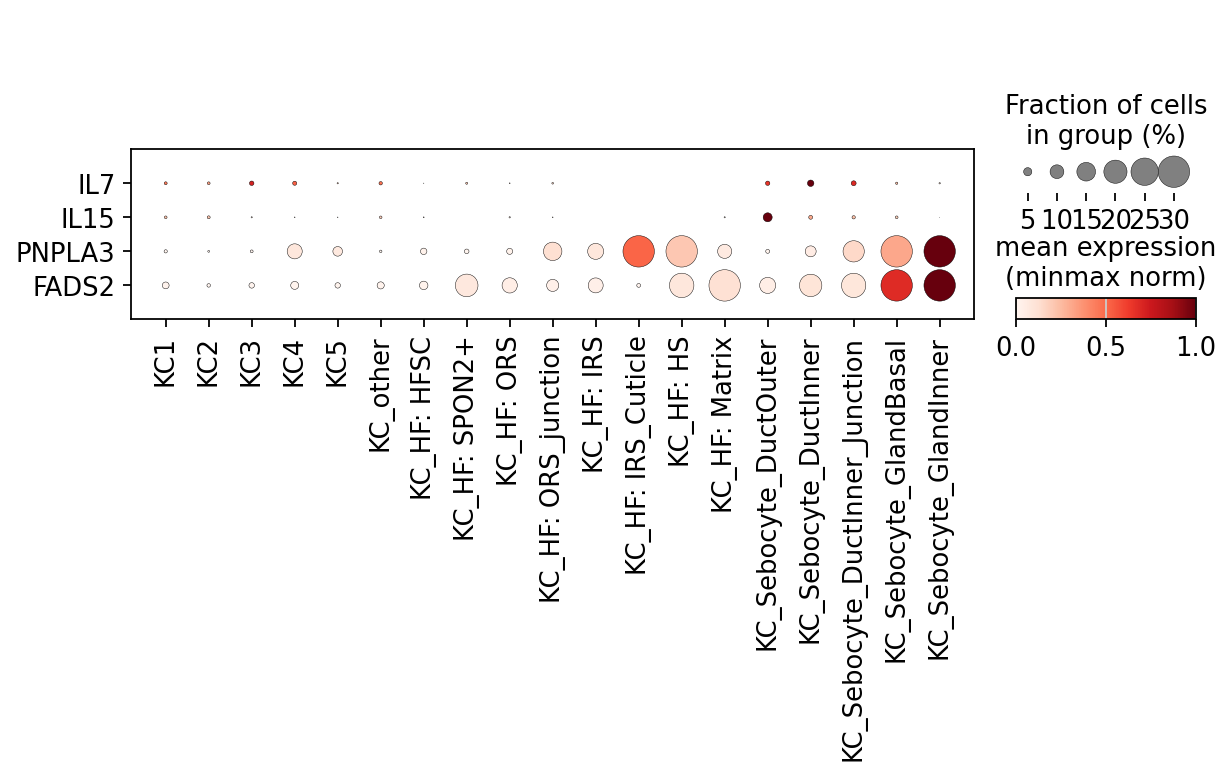

In [18]:
SUMMARY_LIST = sum(SUMMARY.values(), [])
sc.pl.dotplot(
    adata,
    SUMMARY_LIST,
            categories_order=ORDER2,
  groupby="tmp",    standard_scale="var",
    dendrogram=False,
    colorbar_title="mean expression\n(minmax norm)",
       # save="retinoic_dotplot_scrna_list.pdf"

    dot_max=0.3,
    swap_axes=True,
    save="4e_scrna_dotplotsebaceous.pdf"
) 
sc.pl.dotplot(
    adata_5k ,
    remove_markers(SUMMARY_LIST),
           categories_order=ORDER2,
  groupby="tmp",    standard_scale="var",
    dendrogram=False,
    colorbar_title="mean expression\n(minmax norm)",
       # save="retinoic_dotplot_scrna_list.pdf"

    dot_max=0.3,
    swap_axes=True,
    save='4e_xenium_dotplotsebaceous.pdf'
) 

 

# Extra plots

In [24]:
adata_5k_i = adata_5k[adata_5k.obs["niche19"]=="Sebaceous_immune"]
adata_5k_i.obs.info_id6.value_counts()

info_id6
BK22_Lesional Baseline                    961
BK30_Non-lesional Baseline                430
BK51_wk8 Relapse                          360
Lesional_CE4-SKI-27-FO-4-S22-A2           309
BK30_Week 12                              301
Lesional_CE4-SKI-27-FO-4-S22_replicate    296
BK21_Week 12                              232
BK30_Lesional Baseline                    203
BK24_Non-lesional Baseline                176
BK25_Week 12                              113
BK18_Lesional Baseline                     52
3D_BK25_week12-D2                           9
3D_BK25_week12-C2                           6
3D_BK22_Lesional_baseline-A1                4
3D_BK25_week12-B2                           3
BK30_Day 14                                 2
BK22_Non-lesional Baseline                  1
BK18_Week 12                                1
Name: count, dtype: int64

In [25]:
{x:x for x in adata_5k_i.obs.info_id6.value_counts().head(11).index.tolist()}

{'BK22_Lesional Baseline': 'BK22_Lesional Baseline',
 'BK30_Non-lesional Baseline': 'BK30_Non-lesional Baseline',
 'BK51_wk8 Relapse': 'BK51_wk8 Relapse',
 'Lesional_CE4-SKI-27-FO-4-S22-A2': 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK30_Week 12': 'BK30_Week 12',
 'Lesional_CE4-SKI-27-FO-4-S22_replicate': 'Lesional_CE4-SKI-27-FO-4-S22_replicate',
 'BK21_Week 12': 'BK21_Week 12',
 'BK30_Lesional Baseline': 'BK30_Lesional Baseline',
 'BK24_Non-lesional Baseline': 'BK24_Non-lesional Baseline',
 'BK25_Week 12': 'BK25_Week 12',
 'BK18_Lesional Baseline': 'BK18_Lesional Baseline'}

In [26]:
RENAME = {'BK22_Lesional Baseline': 'AD_Lesional',
 'BK30_Non-lesional Baseline': 'AD_Non-lesional',
 'BK51_wk8 Relapse': 'AD_Lesional',
 'Lesional_CE4-SKI-27-FO-4-S22-A2': 'PSO_Lesional',
 'BK30_Week 12': 'AD_Week12',
 'Lesional_CE4-SKI-27-FO-4-S22_replicate': 'PSO_Lesional',
 'BK21_Week 12': 'AD_Week12',
 'BK30_Lesional Baseline': 'AD_Lesional',
 'BK24_Non-lesional Baseline': 'AD_Non-lesional',
 'BK25_Week 12': 'AD_Week12',
 'BK18_Lesional Baseline': 'AD_Lesional'}

adata_5k_i.obs["ss"]=adata_5k_i.obs["info_id6"].map(RENAME)
adata_5k_i=adata_5k_i[~adata_5k_i.obs["ss"].isna()]

/tmp/ipykernel_3038641/1762363132.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_i.obs["ss"]=adata_5k_i.obs["info_id6"].map(RENAME)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


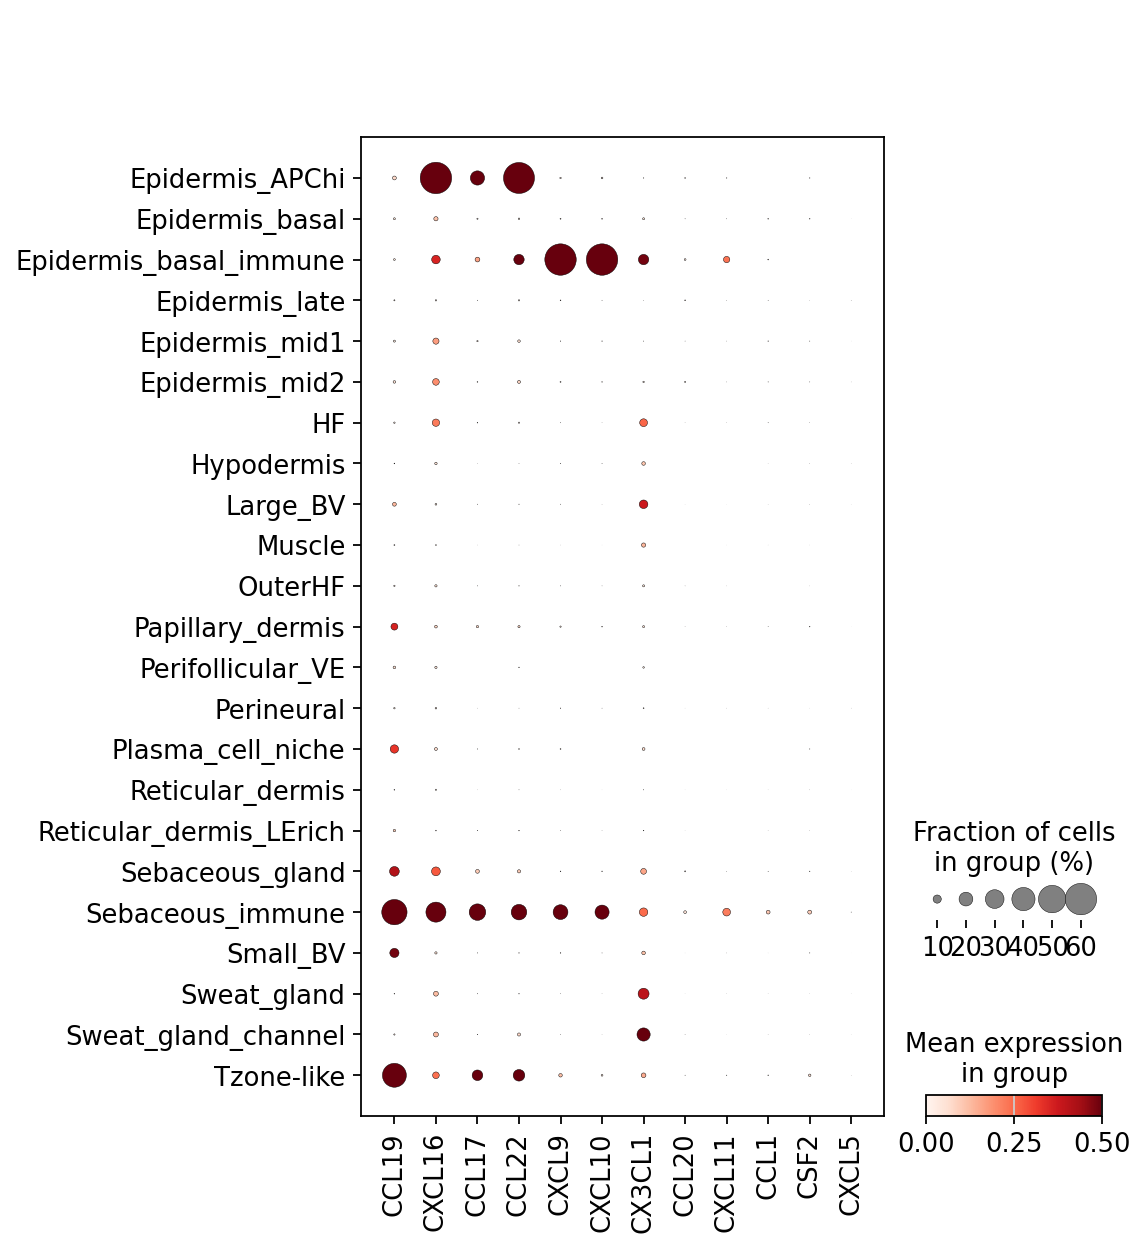

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


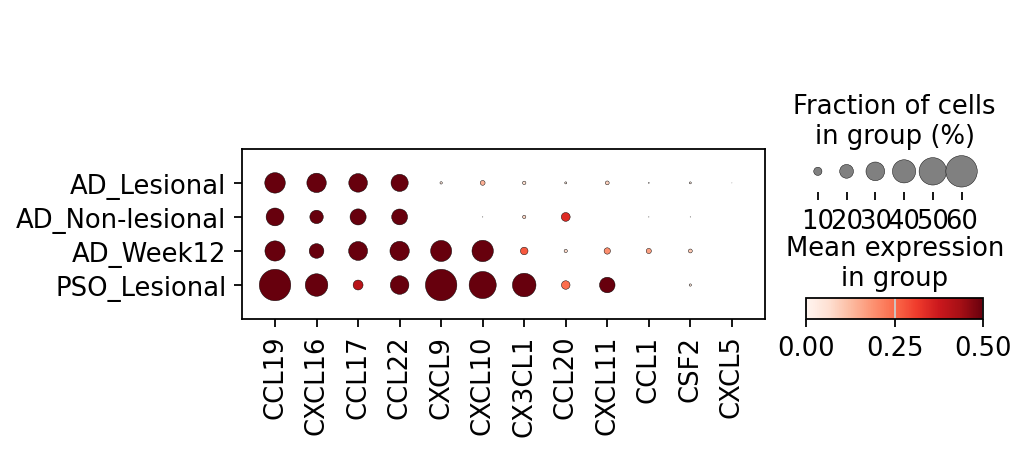

In [27]:
GENES = {"Seb_immune chemokines": ['CCL19', 'CXCL16', 'CCL17', 'CCL22', 'CXCL9', 'CXCL10',],
        "Timepoint chemokines": ['CX3CL1',
                                 #CXCL11, 
                                 'CCL20', 'CXCL11', 'CCL1', 'CSF2', "CXCL5" ]
        }
all_genes = [gene for genes in GENES.values() for gene in genes]


sc.pl.dotplot(
    adata_5k,
    all_genes,
    groupby="niche12",
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    all_genes,
    groupby="ss",
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)

In [28]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered"

PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]
# adata_5k=adata[adata.obs["tech"]!="xenium"]

# adata_5k.obs["Timepoint2"].value_counts()
#adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST


# adata_5k.obs["lvl4_annotation"]=adata_5k.obs["scanvi_predictions"]
# adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl4_annotation"]

adata_5k


sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [ ]:
# --- desired plotting order --------------------------------------------------
desired_order = [
    'KC1', 'KC2', 'KC1-2_cycling', 
    'KC1-2', 'KC2/3_cycling', 'KC3', 'KC4', 'KC5', 'KC6',   'KCinflamm', 
 'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
    'KC_HF', 'KC_HF: ORS-0 (outer)', 'KC_HF: ORS_cycling',
'KC_HF: HFSC',    'KC_HF: SPON2+',

    'KC_HF: ORS-Bulb/infundibulum', 
    'KC_HF: ORS0 scRNAonly', 'KC_HF: ORS0', 'KC_HF0: ORS_LGR5+',
    'KC_HF: IRS0 / KC_HF0: ORS_LGR5+ (cycling)',
    
    'KC: HF ORS1/2 scRNAonly really',
    'KC_HF: ORS-1', 'KC_HF: ORS1',
    'KC_HF: ORS-2 (outer)', 'KC_HF: ORS-2 ? TGM+', 'KC_HF: ORS-2 / GATA6+',
    'KC_HF_Basal', 'KC_HF: Basal', 'KC_HF_Basal: LGR5+ (cycling)',
    'KC_HF: ORS-0', 'KC_HF: ORS-2', 'KC_HF: ORS2','KC_HF: ORS2i', 
    'KC_HF_ORS/CL', 'KC_HF: ORS/CL', 'KC_HF_inner (cycling)',
    'KC_HF: IRS', 'KC_HF: IRS0',  'KC_HF: IRS1',  'KC_HF: IRS2 ( I think same as before)',
    'KC_HF: IRS2', 'KC_HF: IRS_Cuticle', 'KC_HF: IRS_cycling',
    'KC_HF_IRS+HS', 'KC_HF: HS/medulla (GATA3+)', 'KC_HF_Rare',
    'KC_HF: HS', 'KC_HF: IRS_SHH+', 'KC_HF: IRS/HS SHH+TGM+',
    'KC_HF: HS (near junction)', 'KC_HF: HS (near IRS)',
    
     'KC_HF: Matrix',  
    'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer',
    'KC_Sebocyte_CCL19+_cycling', 'KC_Sebocyte_CCL19+',
    'KC_Sebocyte_CCL19+_inflmm', 'KC_Sebocyte_CCL19+_inflAmm',
    'KC_Sebocyte/MIGdc', 'KC_Sebocyte_duct_basal/outer',
    'KC_SebocyteDuct_Outer','KC_Sebocyte_DuctOuter',
    'KC_Sebocyte_duct_outer_cycling', 'KC_Sebocyte_duct_outer_inflamm',
    'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner','KC_Sebocyte_DuctInner',
    'KC_SebocyteGland_Inner / junction',
    'KC_SebocyteDuct_Inner/junction + HF (more hf)',
    'KC_SebocyteDuct_Outer/HF_Junction',
    'KC_SebocyteDuct_Inner/junction + HF','KC_Sebocyte_DuctInner_Junction',  'KC_HF: ORS_junction', 
    'KC_SebocyteDuct_Outer/HF_junction2',
    'KC_SebocyteDuct_Outer ?SCRNA ONLY',
    'KC_Sebocyte_PPARG+_basal/outer', 'KC*_Sebocyte',
    'Sebocyte_basal', 'KC_Sebocyte_PPARG+_basal',
    'KC_SebocyteGland_Outer','KC_Sebocyte_GlandBasal',
    'KC_Sebocyte_PPARG+_inner', 'KC_SebocyteGland_Inner','KC_Sebocyte_GlandInner',
    'KC_Sebocyte_PPARG+', 'KC_Sebocyte: PPARG+',
    'Sebocyte_inner',
    'Sweat gland channel', 'Sweat gland channel_outer',
    'Sweat gland channel outer', 'Sweat gland channel outer? (sebo features)',
    'Sweat gland channel_inner', 'Sweat gland channel inner',
    'Sweat gland channel inner? (lowq i think)',
    'Sweat gland', 'Sweat gland 1', 'Sweat gland 2',
    'Sweat gland 3', 'Sweat gland 4', 'KC_SC: LGR6+ACTA2+',
    'Sweat gland myoepithelial', 'Sweat gland Myoepithelial',
    'Melanocyte',
    'Nonspecific', '?? (near sebo)',
]


# ---------------------------------------------------------------------------
# Deduplicate *without* destroying order (OrderedDict keeps first occurrence)
# ---------------------------------------------------------------------------
from collections import OrderedDict
desired_order = list(OrderedDict.fromkeys(desired_order))


# ---------------------------------------------------------------------------
# Make sure the column is categorical, then set the desired order
# ---------------------------------------------------------------------------
if not pd.api.types.is_categorical_dtype(adata_5k.obs[CATEGORY]):
    adata_5k.obs[CATEGORY] = adata_5k.obs[CATEGORY].astype("category")

# Warn if the data contain labels not present in desired_order
missing_in_order = set(adata_5k.obs[CATEGORY].unique()) - set(desired_order)
if missing_in_order:
    print("These labels are not in desired_order:", missing_in_order)

# Apply the ordering
adata_5k.obs[CATEGORY] = pd.Categorical(
    adata_5k.obs[CATEGORY],
    categories=desired_order,
    ordered=True,
)

# Optionally drop levels that actually have zero cells
adata_5k.obs[CATEGORY] = adata_5k.obs[CATEGORY].cat.remove_unused_categories()

# Quick sanity-check
adata_5k.obs[CATEGORY].value_counts()

In [ ]:
lipid_markers = {
    "Squalene": ["FDFT1", "SQLE"],
    "Fatty acid": ["SCD"],
    "Wax ester": ["AWAT1", "AWAT2"],
    "TG synthesis": ["DGAT1", "DGAT2"],
    "Cholesterol synthesis": ["DHCR7", "DHCR24"],
    "Fatty acid generation": ["FADS2"],
    "Biolipid synthesis": ["PNPLA3"]
}

sc.pl.dotplot(adata, 
              lipid_markers,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var")




In [ ]:
Seb_ra_genes = {
    "Store retinyl esters/retinol": ["DHRS3", "LRAT", "DGAT1"],
    "Break down retinyl esters":    ["PNPLA3"],
    "Break down retinol":           ["RDH10"],
    "Break down retinaldehyde":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
}

sc.pl.dotplot(
    adata,
    Seb_ra_genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 



In [ ]:
# SUMMARY ={"TRM cytokines": ["IL7", "IL15"],
#             "Retinaldehyde -> Retinoic acid":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
#           "Generate retinaldehyde": ["RDH10", "PNPLA3"]
#          }

# sc.pl.dotplot(
#     adata,
#     SUMMARY,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #dot_max=0.2,
#     #swap_axes=True
# ) 


In [ ]:
SUMMARY ={"TRM cytokines": ["IL7", "IL15"],
            "Retinaldehyde -> Retinoic acid":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
         # "Generate retinaldehyde": ["RDH10", "PNPLA3"],
          "Fatty acid+retinol synthesis": ["PNPLA3"]
        #  "Alarmins": ["TSLP", "IL33", "IL25"],
             # "Attract migDCs": ["CCL19", "IL20"],
                       #       "Attract MigDC/T": ["CCL19"],# "IL20", "IL19", "IL23A", "IL5", "IL9", "IL13", "IL4"]


         }

#SUMMARY = [gene for genes in SUMMARY.values() for gene in genes]

#print(all_genes)
try:
    sc.pl.dotplot(
        adata,
        SUMMARY,
        groupby=CATEGORY,
        #standard_scale="var",
        dendrogram=False,
            save="retinoic_dotplot_scrna.pdf"

        #dot_max=0.2,
        #swap_axes=True
    ) 
except:
    sc.pl.DotPlot(
            adata,
           remove_markers(SUMMARY),
            #swap_axes=True,
            groupby=CATEGORY,
           vmax=.8,
            #    colorbar_title='Mean expression\n(variance scaled)', 
           # standard_scale="var",
        ) \
            .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
                       dot_max=.6

                  )\
        .show()


SUMMARY_LIST = sum(SUMMARY.values(), [])
sc.pl.dotplot(
    adata,
    SUMMARY_LIST,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
        save="retinoic_dotplot_scrna_list.pdf"

    #dot_max=0.2,
    #swap_axes=True
) 


sc.pl.DotPlot(
        adata_5k,
       remove_markers(SUMMARY_LIST),
        #swap_axes=True,
        groupby=CATEGORY,
       vmax=.8,
        #    colorbar_title='Mean expression\n(variance scaled)', 
       # standard_scale="var",
    ) \
        .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=1, grid=False, #vmax=.8
                   dot_max=.3

              )\
    .show()


In [ ]:
# SUMMARY ={"TRM cytokines": ["IL7", "IL15"],
#             "Retinaldehyde -> Retinoic acid":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
#           "Generate retinaldehyde": ["RDH10", "PNPLA3"],
#           "Alarmins": ["TSLP", "IL33", "IL25"],
#              # "Attract migDCs": ["CCL19", "IL20"],
#                               "Attract MigDC/T": ["CCL19"],# "IL20", "IL19", "IL23A", "IL5", "IL9", "IL13", "IL4"]


#          }

# sc.pl.dotplot(
#     adata,
#     SUMMARY,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#         save="retinoic_dotplot_scrna.pdf"

#     #dot_max=0.2,
#     #swap_axes=True
# ) 


In [ ]:
# SUMMARY_LIST = sum(SUMMARY.values(), [])
# sc.pl.dotplot(
#     adata,
#     SUMMARY_LIST,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#         save="retinoic_dotplot_scrna_list.pdf"

#     #dot_max=0.2,
#     #swap_axes=True
# ) 


In [ ]:

SUMMARY ={"TRM cytokines": ["IL7", "IL15"],
            "Retinaldehyde -> Retinoic acid":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
          "Generate retinaldehyde": ["RDH10", "PNPLA3"],
          "Alarmins": ["TSLP", "IL33", "IL25"],
             # "Attract migDCs": ["CCL19", "IL20"],
                              "Attract MigDC/T": ["CCL19", "CCL1"],# "IL20", "IL19", "IL23A", "IL5", "IL9", "IL13", "IL4"]


         }

sc.pl.dotplot(
    adata,
    SUMMARY,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
     #   save="retinoic_dotplot_scrna.pdf"

    #dot_max=0.2,
    #swap_axes=True
) 

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche17_alt2"]=="Sebaceous_immune"]
adata_5k_i.shape
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()

GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



In [ ]:
STOP

In [ ]:
# genes = [
#     "LAYN", "XYLT1", "GPR15", "AREG", "KLRC4", "ADGRG1", "RGS9", "LRRN3", "FXYD2", "XCL1", 
#     "TRDC", "TRGV4", "EMP1", "KLRC3", "KRT86", "SPINT2", "FCER1G", "TYROBP", "ADGRG3", "OASL", 
#     "ZNF407", "ZBTB20", "ID3", "SPINK2", "RAMP1", "MB", "KLRF2", "PTGDS", "AIF1", "KRT81", 
#     "KRT14", "CST6", "ASIC2", "DCC", "CDH4", "CDH18", "RBFOX1", "RALYL", "CSMD1", "ACAN", 
#     "IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "SDC1", "PLAC8", 
#     "S1PR2", "VCAN", "S100A8", "S100A9", "S100A12", "LYVE1", "STAB1", "SPP1", "NUMBL", "PPY", 
#     "IL22RA2", "LAMP5", "IGKJ5", "PTCRA", "PROK2", "CLC", "S100P", "MS4A3", "TCN1", "CACNG8", 
#     "TPSAB1", "TPSB2", "ALDH1A1", "ALDH1A2", "ALDH1A3", "BHLHE41", "C3", "KCNQ3", "UNC5B", 
#     "ELAVL4", "LFNG", "KRT6A", "KRT6B", "GPX3", "IL31RA", "KRT75", "KRT85", "KRT35", "KRT25", 
#     "KRT82", "PADI3", "TCHH", "MRGPRX1", "MRGPRX3", "NKD2", "RSPO1", "WIF1", "CRABP1", "CXCL1", 
#     "SLPI", "APOC1", "C7", "PLA2G2A", "MYOC", "GDF10", "CD74", "DPEP1", "MYL4", "TNN", "RSPO4", 
#     "SLITRK6", "NRG3", "HHIP", "FMO2", "PLEKHA6", "CXCL8", "MMP1", "MMP3", "CHI3L1", "CCL11", 
#     "AWAT2", "LRAT", "ADAM19", "MYEOV", "NRG1", "OGN", "ACTA2", "TAGLN", "COL8A1", "CDH2", 
#     "LRRC17"
# ]
# print(len(genes))   

In [ ]:
# sc.pl.dotplot(adata, 
#               genes[:60],
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#                 standard_scale="var",
#              #dot_max=0.8,
#              )
# sc.pl.dotplot(adata, 
#               genes[60:],
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#                 standard_scale="var",
#              #dot_max=0.8,
#              )

In [ ]:
# adata.write('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna10.h5ad.KConly')

In [ ]:
# ilc1_GENES = ["APOBEC3D", "GZMK", "GZMA", "CXCR3", "GZMH", "ANKS6", "TCL1A", "ADGRG5", "APOM"]
# sc.pl.dotplot(adata, 
#               ilc1_GENES,
#               groupby="lvl5_annotation_new3",
#               dendrogram=False, 
#                 standard_scale="var",
#              #dot_max=0.8,
#              )
# sc.pl.dotplot(adata, 
#               remove_markers(ilc1_GENES),
#               groupby="lvl5_annotation_new3",
#               dendrogram=False, 
#                 standard_scale="var",
#              #dot_max=0.8,
#              )


In [ ]:
# adata=adata[adata.obs["lvl5_annotation"].str.startswith("KC")].copy()
# import gc
# gc.collect()

# # adata.obs.lvl4_annotation.value_counts()

In [ ]:
# CATEGORY="lvl4_annotation"


In [ ]:
# import pandas as pd
# from collections import OrderedDict


# # ------------------------------------------------------------------
# # 1.  Desired plotting order  (remove duplicates, keep order)
# # ------------------------------------------------------------------
# desired_order = list(OrderedDict.fromkeys([
#     'KC1', 'KC1/2', 'KC1/2_cycling', 'KC1-2_cycling',
#     'KC2', 'KC2/3_cycling', 'KC3', 'KC4', 'KC5',
#     'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late', 'KCinflamm',
#     'KCinflamm_int/late', 'KCinflamm_cycling',
#     'KC_HF: Basal_LGR5+', 'KC_HF: Basal LGR5+',
#     'KC_HF: Basal_NPNT+', 'KC_HF: ORS-0', 'KC_HF: ORS0',
#     'KC_HF: ORS1', 'KC_HF: ORS2', 'KC_HF: ORS 1/2',
#     'KC_HF: ORS1/2', 'KC: HF ORS1/2', 'KC_HF: ORS_cycling',
#     'KC_HF: ORS/CL', 'KC_HF_CL',
#     'KC_HF: IRS+HS', 'KC_HF_IRS/HS', 'KC_HF: IRS',
#     'KC_HF: IRS_cycling', 'KC_HF: IRS_TCHH+',
#     'KC_HF: HS', 'KC_HF_cycling',
#     'KCinflamm_Sebocyte_basal', 'KC_Sebocyte_basal',
#     'KC_Sebocyte_duct_basal/outer', 'KC_SebocyteDuct_Outer',
#     'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer-LOWQ',
#     'KC*_Sebocyte',
#     'KC_Sebocyte_inner', 'KC_Sebocyte_inner2',
#     'KC_Sebocyte_inner1',
#     'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner',
#     'KC_SebocyteDuct_Outer/HF_Junction',
#     'KC_SebocyteDuct_Outer/HF_junction2', 'KC_SebocyteDuct_Outer/HF_junction',
#     'KC_Sebocyte_PPARG+_basal', 'KC_SebocyteGland_Outer',
#     'KC_SebocyteGland_outer', 'KC_SebocyteGland_Inner',
#     'KC_Sebocyte_PPARG+_basal_cycling',
#     'KC_Sebocyte_PPARG+_basal/outer', 'KC_Sebocyte_int',
#     'KChf/cycling/ KC_Sebocyte_PPARG+_inner', 'KC_Sebocyte_cycling',
#     'Sweat gland channel outer', 'Sweat gland channel cycling',
#     'Sweat gland channel inner', 'Sweat gland',
#     'KC_SC: LGR6+ACTA2+', 'Sweat gland Myoepithelial',
#     'Sweat gland myoepithelial',
#     'KC/lowq_mastcell', 'KC_cycling/Mac_doublet',
#     'KC/lowq_melanocyte/T', 'KC*', 'KC_Outlier?',
#     'KC/lowq_mac_doublet', 'Sweat gland_plasma doublet',
#     'KChf_cycling', 'Sweat gland_cycling',
#     "missing",
# ]))

# # ------------------------------------------------------------------
# # 2.  Helper to apply ordering and drop empty categories
# # ------------------------------------------------------------------
# def apply_order(adata_obj):
#     # cast to categorical
#     adata_obj.obs[CATEGORY] = adata_obj.obs[CATEGORY].astype("category")
#     # apply desired order
#     adata_obj.obs[CATEGORY] = adata_obj.obs[CATEGORY].cat.set_categories(
#         desired_order, ordered=True
#     )
#     # warn if data contains unseen labels
#     unseen = set(adata_obj.obs[CATEGORY].unique()) - set(desired_order)
#     if unseen:
#         raise ValueError(f"Labels in data but not desired_order:\n{unseen}")
#     # drop zero-count categories so plots don’t show blanks
#     adata_obj.obs[CATEGORY] = adata_obj.obs[CATEGORY].cat.remove_unused_categories()

# # apply to both AnnData objects
# apply_order(adata)
# apply_order(adata_5k)

# # quick sanity-check
# print(adata.obs[CATEGORY].value_counts().head())

In [ ]:
adata.obs.lvl5_annotation.isna().sum()

In [ ]:
adata_5k.obs.lvl5_annotation.isna().sum()

In [ ]:
adata_5k.obs.lvl5_annotation.value_counts()

In [ ]:
CATEGORY

In [ ]:


sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [ ]:
sc.pl.dotplot(adata_5k, 
              remove_markers(lipid_markers),
              groupby="lvl5_annotation_new3",
              dendrogram=False, 
                standard_scale="var")

sc.pl.dotplot(
    adata_5k,
    remove_markers(SUMMARY),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3,
    save="retinoic_dotplot_xenium.pdf"
   # swap_axes=True
) 

In [ ]:
# SEBOCYTE_GENES=["CYP11A1", "HSD3B2", "CYP17A1", "SRD5A2", "HSD17B1", "PGR",
#                 "PLIN2", "ANGPT1", "IGF1", "CRHR1", "CRHR2", "AR", "CRHBP", "TAC1"]

# sc.pl.dotplot(
#     adata,
#     SEBOCYTE_GENES,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# ) 

# sc.pl.dotplot(adata_5k, 
#               remove_markers(SEBOCYTE_GENES),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,)


In [ ]:
sc.pl.dotplot(adata_5k, 
              remove_markers(Seb_ra_genes),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)

In [ ]:
# causal_genes = [
#     "ERRFI1",
#     "SOAT1",
#     "LAMC2",
#     "LAMC1",
#     "INAVA",
#     "LGR6",
#     "PPP1R12B",
#     "TGFB2",
#     "LYPLAL1",
#     "BCL11A",
#     "EDAR",
#     "IL36RN",
#     "IL1B",
#     "WNT10A",
#     "TIMP4",
#     "CSTA",
#     "DLG1",
#     "FGF2",
#     "SPRY1",
#     "EDNRA",
#     "FGF10",
#     "FST",
#     "ANKRD55",
#     "FCHO2",
#     "SLC22A5",
#     "PDLIM4",
#     "SLC22A4",
#     "TBX18",
#     "PRDM1",
#     "SUGCT",
#     "PRAG1",
#     "SOX7",
#     "C8orf48",
#     "SHB",
#     "RASSF10",
#     "DBX1",
#     "MAP3K11",
#     "OVOL1",
#     "PCNX3",
#     "MYEOV",
#     "BORCS5",
#     "SPRY2",
#     "SPPL2A",
#     "USP50",
#     "TRPM7",
#     "SEMA4B",
#     "CLEC16A",
#     "ADAMTS18",
#     "PARD6G",
#     "SPECC1L",
#     "UPB1",
#     "TIMP3",
#     "PNPLA3",
#     "CRELD2",
#     "ALG12",
#     "PIM3",
# ]
# sc.pl.dotplot(
#     adata,
#     causal_genes,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #dot_max=0.2,
#     #swap_axes=True
# ) 
# sc.pl.dotplot(
#     adata_5k,
#     remove_markers(causal_genes),
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #dot_max=0.2,
#    # swap_axes=True
# ) 

In [ ]:
CATEGORY


In [ ]:
cell_types = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"].obs.lvl4_annotation.unique()
adata_sebimmuneniche = adata[adata.obs["lvl4_annotation"].isin(cell_types)]
sc.pl.dotplot(
    adata_sebimmuneniche,
    remove_markers(SUMMARY),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.5,
   # swap_axes=True
) 

In [ ]:
# SUMMARY ={"TRM cytokines": ["IL7", "IL15"],
#             "Retinaldehyde -> Retinoic acid":     ["ALDH1A1", "ALDH1A2", "ALDH1A3"],
#           "Generate retinaldehyde": ["RDH10", "PNPLA3"]
#          }

# sc.pl.dotplot(
#     adata_5k,
#     remove_markers(SUMMARY),
#     groupby="niche12",
#     standard_scale="var",
#     dendrogram=False,
#     dot_max=0.3,
#    # swap_axes=True
# ) 

In [ ]:
# need to do above plots but show niche present vs absent

In [ ]:

ACNE_GWAS = [#"MRPS36P2", 
    "DDB2", "CACNA1H", "ADAM19", "GNAI1",
            "CDH13", "GABRG2", "CYP21A2", "CYP19A1",
    "CXCL8", 
            ]
sc.pl.dotplot(
    adata,
    ACNE_GWAS,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #dot_max=0.2,
    #swap_axes=True
) 
sc.pl.dotplot(
    adata_5k,
    remove_markers(ACNE_GWAS),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #dot_max=0.2,
   # swap_axes=True
) 

In [ ]:
"""
get new acne gwas genes
plot retinoic acid genes from figure
"""

In [ ]:
pathway_genes = {
    "TRM cytokines": ["IL7", "IL15"],
    "attract migDCs": ["CCL19"],
    "Store retinoic acid": ["LRAT", "DHRS3", "DGAT1"],
    "Generate retinoic acid": ["PNPLA3", "RDH10", "ALDH1A1", "ALDH1A2", "ALDH1A3"]
}
sc.pl.dotplot(adata, 
              pathway_genes,
              groupby="lvl5_annotation",
              dendrogram=False, 
            standard_scale="var",
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
lipolysis_genes = ["PNPLA2", "ABHD5", "LIPE", "MGLL"]
sc.pl.dotplot(adata, 
              pathway_genes,
              groupby="lvl5_annotation",
              dendrogram=False, 
            standard_scale="var",
              #vmax=1,
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]
adata_5k_i.shape
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()

GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



# PLots

In [ ]:
FILE_NAME = "adata_xenium_freeze.h5ad"  #"adata_xenium_v3.h5ad.final.timepointsforpaper"
PATH=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'

adata_5k=sc.read_h5ad(PATH)
# adata_5k.obs["Timepoint2"].value_counts()
#adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST



adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl5_annotation"]

adata_5k



In [ ]:
sc.pl.dotplot(
    adata_5k,
    remove_markers(SUMMARY),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3,
   # swap_axes=True
) 
sc.pl.dotplot(
    adata_5k,
    remove_markers(SUMMARY_LIST),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    dot_max=0.3,
    save="retinoic_dotplot_xenium.pdf"
   # swap_axes=True
) 

# Show VE positions

In [ ]:
# adata_5k.obs["Annotation"]=adata_5k.obs["lvl4_annotation"]
# #['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']
# CELL_TYPE = [x for x in adata_5k.obs["Annotation"].unique() if x.startswith("VE") or x.startswith("VE4") or x.startswith("LE") ]#or x.startswith("cDC1")] #or x.startswith("pDC") or x.startswith("T") or x.startswith("ILC")]
# MIN_CELL_COUNT=10 #  for VE3_Ven_APLN
# {x:x for x in CELL_TYPE}


In [ ]:


# i=0

# adata_5k_i=adata_5k[adata_5k.obs["disease_overall"]=="Psoriasis"]
# adata_5k_i=adata_5k_i[adata_5k_i.obs["Site_status"]=="Lesional"]

# for tissue_section_id in adata_5k_i.obs["sample_id"].unique():
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
#     niche_names_found = adata_i.obs["Annotation"].unique()
#     STATUS =  adata_i.obs["info_id2"].unique()[0]
#     #print(i, "ve3" in niche_names_found)
# #     if tissue_section_id=="output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417":
# #         print(tissue_section_id)
# #         display(adata_i.obs["Annotation"].value_counts())
#     if 'VE3_Ven_APLN+' in niche_names_found:
#         CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]=='VE3_Ven_APLN+'].shape[0]
#         print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

#         if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="Annotation",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             #print(tissue_section_id)
#     #         sq.pl.spatial_scatter(
#     #             adata_i,
#     #             library_id="spatial",
#     #             shape=None,
#     #             color="Annotation",
#     #             size=5,
#     #             vmax=1,
#     #             title=tissue_section_id,
#     #             #ax=ax,
#     #             legend_loc="on data"  # Disable the legend for each subplot
#     #         )
#             adata_i.obs["test"] = [x if x in CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]] 
#             adata_i.uns.pop('test_colors')
#             adata_i.obs["test"]= adata_i.obs["test"].astype('category')
#             adata_i.uns['test_colors'] = [COLORS[cat] for cat in adata_i.obs["test"].cat.categories]
#             #NUM = ord(CELL_TYPE[1][0])
#             #if NUM <79:
#             #    custom_palette =ListedColormap([  "red", 'blue',  "lightgrey"])
#             #else:
#             #    custom_palette = ListedColormap([  "lightgrey", 'blue', "red"])
#             sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="test",
#                     size=15,
#                     vmax=1,
#                     linewidth=0.01,
#                     edgecolor='black',
#                     title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
#                     #palette=custom_palette,

#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )
# #             sq.pl.spatial_scatter(
# #                     adata_i,
# #                     library_id="spatial",
# #                     shape=None,
# #                     color="niche11",
# #                     size=15,
# #                     vmax=1,
# #                     linewidth=0.01,
# #                     edgecolor='black',
# #                     title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
# #                     #palette=custom_palette,

# #                     #ax=ax,
# #                     #legend_loc="on data"  # Disable the legend for each subplot
# #                 )
 
# #             sq.gr.spatial_neighbors(adata_i, 
# #                                          spatial_key='spatial', #elements_to_coordinate_systems=None, table_key=None, library_key=None, coord_type=None, 
# #                                          n_neighs=4,
# #                                        # radius=20
# #                                    )# radius=None, 
# #             #adata_5k_perivasc = adata_5k[adata_5k.obs["niche_name"]=="Perivascular_T-rich"]
# #             #adata_5k_perivasc = adata_5k_perivasc[adata_5k_perivasc.obs["Timepoint"]=="Lesional Baseline"]



# #             sq.pl.spatial_scatter(
# #                 adata_i,
# #                 shape=None,
# #                 color="Annotation",
# #                 connectivity_key="spatial_connectivities",
# #                 size=1,
# #             )
# #             sq.gr.nhood_enrichment(adata_i, cluster_key="test")
# # #             sq.pl.nhood_enrichment(
# # #                 adata_i,
# # #                 cluster_key="Annotation",
# # #                 #figsize=(8, 8),
# # #                 title="Neighborhood enrichment adata",
# # #                 vmax=10,
# # #                 vmin=-10,
# # #                 cmap="Reds", #"bwr",
# # #                 #font_size=4,
# # #                 figsize=(3,3),
# # #                 #ax=ax[0],
# # #             )
# #             sq.pl.nhood_enrichment(
# #             adata_i,
# #             cluster_key="test",
# #             title="",
# #             vmax=10,
# #             vmin=-10,
# #             cmap="Reds",
# #             figsize=(18, 18),
# #             #save = "supp4b_right.pdf"
# #         )


       

#         else:
#              print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
import warnings
import anndata                                     # for the implicit-mod warning class

# ─────────── blanket nuke (discouraged) ───────────
# warnings.filterwarnings("ignore")                # <- hides *everything*

# ─────────── surgical filters (better) ───────────
# 1. pandas FutureWarning about `na_action`
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*na_action.*pandas\.Categorical\.map"
)

# 2. squidpy UserWarning about 'c' / 'cmap'
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module=r"squidpy\.pl\._spatial_utils"
)

# 3. AnnData ImplicitModificationWarning
warnings.filterwarnings(
    "ignore",
    category=anndata._core.views.ImplicitModificationWarning
)

# Sebaceous gland cmpositioon

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Constants
NICHE11 = "Sebaceous gland"
MINIMUM_PERCENT = 0.05
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin_XENIUMcelltypes.pkl'

# Filter the data
adata_filtered = adata_5k[
    adata_5k.obs["niche11"]==NICHE11
]
sample_counts = adata_filtered.obs["sample_id"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional", "Lesional Baseline"]
#adata_filtered = adata_filtered[adata_filtered.obs["Timepoint"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["sample_id"].isin(valid_samples)]
#adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("KC_S")]
#adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("Sweat")]
#adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("Nonsp")]

# Extract relevant columns
df = adata_filtered.obs[["sample_id", "final_annotation_lvl5_4", "disease_overall"]].copy()

# Count cell types per disease group
grouped = df.groupby(["disease_overall", "final_annotation_lvl5_4"]).size().reset_index(name="cell_count")
pivot = grouped.pivot(index="disease_overall", columns="final_annotation_lvl5_4", values="cell_count").fillna(0)

# Normalize to get percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out low-percentage cell types
proportions = proportions.loc[:, (proportions >= MINIMUM_PERCENT).any(axis=0)]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)

# Map colors
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(10, 4))  # increase height to fit legend
proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axes labels and title
ax.set_ylabel("Disease Group", fontsize=15)
ax.set_xlabel("Proportion", fontsize=15)
ax.set_title(f"{NICHE11} — Cell Type Proportions per Disease", fontsize=16)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=14)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=14)

# Legend below plot
ax.legend(
    title="Cell Type",
    labels=proportions.columns,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),  # adjust vertical position lower
    ncol=6,  # increase columns to prevent wrapping
    fontsize=12,
    title_fontsize=10,
    frameon=False
)
 
# Clean up
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
colors

In [ ]:
# import pickle

# file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# with open(file_path, "rb") as fh:
#     colors = pickle.load(fh)

# # sanity check
# print(f"Loaded {len(colors)} colour entries")

# # Constants
# NICHE11 = "Epidermis_basal_immune"
# MINIMUM_PERCENT = 0.05
# #COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin_XENIUMcelltypes.pkl'

# # Filter the data
# adata_filtered = adata_5k[
#     adata_5k.obs["niche12"]==NICHE11
# ]
# sample_counts = adata_filtered.obs["sample_id"].value_counts()
# valid_samples = sample_counts[sample_counts > 10].index
# #KEEP = ["Lesional", "Lesional Baseline"]
# #adata_filtered = adata_filtered[adata_filtered.obs["Timepoint"].isin(KEEP)]
# adata_filtered = adata_filtered[adata_filtered.obs["sample_id"].isin(valid_samples)]
# adata_filtered=adata_filtered[adata_filtered.obs["lvl4_annotation"]!="Nonspecific"]
# #adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("KC_S")]
# #adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("Sweat")]
# #adata_filtered = adata_filtered[~adata_filtered.obs["final_annotation_lvl5_4"].str.startswith("Nonsp")]
# vc   = adata_filtered.obs["lvl4_annotation"].value_counts()
# keep = vc[vc >= 5].index                # categories that meet the cutoff

# adata_filtered = adata_filtered[adata_filtered.obs["lvl4_annotation"].isin(keep)]
# # Extract relevant columns
# df = adata_filtered.obs[["sample_id", "lvl4_annotation", "disease_overall"]].copy()

# # Count cell types per disease group
# grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
# pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# # Normalize to get percentages
# proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# # Filter out low-percentage cell types
# proportions = proportions.loc[:, (proportions >= MINIMUM_PERCENT).any(axis=0)]



# # Map colors
# plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# # Plot
# fig, ax = plt.subplots(figsize=(10, 4))  # increase height to fit legend
# proportions.plot(
#     kind="barh",
#     stacked=True,
#     color=plot_colors,
#     edgecolor="black",
#     ax=ax
# )

# # Axes labels and title
# ax.set_ylabel("Disease Group", fontsize=15)
# ax.set_xlabel("Proportion", fontsize=15)
# ax.set_title(f"{NICHE11} — Cell Type Proportions per Disease", fontsize=16)
# ax.set_yticks(range(len(proportions)))
# ax.set_yticklabels(proportions.index, fontsize=14)
# ax.set_xticks([0, 50, 100])
# ax.set_xticklabels(["0%", "50%", "100%"], fontsize=14)

# # Legend below plot
# ax.legend(
#     title="Cell Type",
#     labels=proportions.columns,
#     loc="upper center",
#     bbox_to_anchor=(0.5, -0.3),  # adjust vertical position lower
#     ncol=6,  # increase columns to prevent wrapping
#     fontsize=12,
#     title_fontsize=10,
#     frameon=False
# )
 
# # Clean up
# ax.grid(False)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# plt.tight_layout()
# plt.show()


In [ ]:


# Constants
NICHE11 = "Sebaceous gland"  # or whatever your niche is
MINIMUM_PERCENT = 0
COLOR_PICKLE_PATH =  '/nfs/team298/ls34/color_for_adult_skin.pkl'

# Filter data for relevant niche
adata_filtered = adata_5k[adata_5k.obs["niche11"] == NICHE11]
sample_counts = adata_filtered.obs["sample_id"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
adata_filtered = adata_filtered[adata_filtered.obs["sample_id"].isin(valid_samples)]

# Extract necessary columns
df = adata_filtered.obs[["sample_id", "final_annotation_lvl5_4", "disease_overall", "Site_status_binary"]].copy()

# Combine Site_status_binary and disease_overall
df["group_id"] = df["Site_status_binary"].astype(str) + " | " + df["disease_overall"].astype(str)

# Count occurrences of each cell type per group
grouped = df.groupby(["group_id", "final_annotation_lvl5_4"]).size().reset_index(name="cell_count")

# Pivot and normalize to percentages
pivot = grouped.pivot(index="group_id", columns="final_annotation_lvl5_4", values="cell_count").fillna(0)
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.loc[:, (proportions >= MINIMUM_PERCENT).any(axis=0)]

# Extract group labels for sorting
proportions["Site_status"] = proportions.index.str.extract(r'^(.*?)\s+\|')[0]
proportions["Disease"] = proportions.index.str.extract(r'^\s*.*?\|\s*(.*)$')[0]

# Sort
proportions = proportions.sort_values(by=["Disease", "Site_status"])
group_labels = proportions.index
proportions = proportions.drop(columns=["Site_status", "Disease"])

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)

# Color map for columns
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis labels and ticks
ax.set_ylabel("Site status | Disease", fontsize=15)
ax.set_xlabel("Proportion", fontsize=15)
ax.set_title(f"{NICHE11} — Cell Type Proportions by Site and Disease", fontsize=16)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(group_labels, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=14)

# Clean aesthetics
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Legend below plot
legend = ax.legend(
    title="Cell Type",
    labels=proportions.columns,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=5,
    fontsize=10,
    title_fontsize=10,
    frameon=False
)


MINIMUM_PERCENT_FOR_TEXT=0.5
for idx, (group, row) in enumerate(proportions.iterrows()):
    cumulative = 0
    for cell_type in proportions.columns:
        value = row[cell_type]
        if value > MINIMUM_PERCENT_FOR_TEXT:
            ax.text(
                cumulative + value / 2,  # x position (middle of the bar segment)
                idx,                    # y position (the group)
                f"{cell_type}\n{value:.1f}%",
                va='center',
                ha='center',
                fontsize=4,
                color='black' if value < 30 else 'white',  # black on pale bars, white on dark
                weight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Give room for the legend
plt.show()


# SHOW TISSUE SECTIONS WITH NICHE

In [ ]:
# """
# find niche
# """
# import warnings
# NICHE = "Sebaceous gland_immune"#"Epidermis_Inflamm_immune"
# print(NICHE)

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
# sample_counts = adata_5k_i.obs["info_id2"].value_counts()
# samples_to_keep = sample_counts[sample_counts > 100].index
# SAMPLES=[]

# ORDER = []
# for i,DONOR_ID in enumerate(samples_to_keep):
#     print(i+1, "/", len(samples_to_keep))
#     adata_i =  adata_5k_i[adata_5k_i.obs["info_id2"]==DONOR_ID]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
#     DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.info_id.unique())[0]
#     niche_names_found = adata_i.obs["niche12"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche12"]==NICHE]
#         CELL_COUNT = adata_ii.shape[0]
#         print("Cell count for slide: ", CELL_COUNT)
#         print()
#         if CELL_COUNT > 100:
#     #         if i ==0:
#             SAMPLES.append(DONOR_ID)
#             sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="niche12",
#                 size=60,
#                 vmax=1,
#                 title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                 edgecolor='black',
#                 linewidth=0.1,
#                 legend_loc=None
#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )       
#             i=i+1
#             adata_ii = adata_i[adata_i.obs["niche12"]=="Sebaceous_immune"]

            
            
# SAMPLES

In [ ]:
# """
# find niche
# """
# import warnings
# NICHE = "Sebaceous gland_immune"#"Epidermis_Inflamm_immune"
# print(NICHE)

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
# sample_counts = adata_5k_i.obs["sample_id"].value_counts()
# samples_to_keep = sample_counts[sample_counts > 100].index


# ORDER = []
# for i,DONOR_ID in enumerate(samples_to_keep):
#     print(i+1, "/", len(samples_to_keep))
#     adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
#     DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.info_id.unique())[0]
#     niche_names_found = adata_i.obs["niche11"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche11"]==NICHE]
#         CELL_COUNT = adata_ii.shape[0]
#         print("Cell count for slide: ", CELL_COUNT)
#         print()
#         if CELL_COUNT > 100:
#     #         if i ==0:

#             sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="lvl5_annotation",
#                 size=60,
#                 vmax=1,
#                 title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                 edgecolor='black',
#                 linewidth=0.1,
#                 legend_loc=None
#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )       
#             i=i+1
#             adata_ii = adata_i[adata_i.obs["niche12"]=="Sebaceous_immune"]

            
            


In [ ]:
# """
# find niche
# """
# NICHE = "Sebaceous gland_immune"#"Epidermis_Inflamm_immune"
# print(NICHE)

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
# sample_counts = adata_5k_i.obs["sample_id"].value_counts()
# samples_to_keep = sample_counts[sample_counts > 100].index


# ORDER = []
# for i,DONOR_ID in enumerate(samples_to_keep):
#     print(i+1, "/", len(samples_to_keep))
#     adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
#     DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.info_id.unique())[0]
#     niche_names_found = adata_i.obs["niche11"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche11"]==NICHE]
#         CELL_COUNT = adata_ii.shape[0]
#         print("Cell count for slide: ", CELL_COUNT)
#         print()
#         if CELL_COUNT > 100:
#     #         if i ==0:
#             if DONOR == "BK25":
#                 SAMPLES.append(DONOR_ID)

#                 sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="lvl5_annotation",
#                 size=20,
#                 vmax=1,
#                 title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                 edgecolor='black',
#                 linewidth=0.08,
#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )       
#             else:
#                 sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="lvl5_annotation",
#                     size=6,
#                     vmax=1,
#                     title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
#                     edgecolor='black',
#                     linewidth=0.08,
#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )       
#             i=i+1
# print(SAMPLES)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import warnings

# ------------------------------------------------------------------
# CONSTANTS
# ------------------------------------------------------------------
NICHE          = "Sebaceous_immune"
NICHE_COLUMN   = "niche12"
HIGHLIGHT_COL  = "#ff6145"   # red
OTHER_COL      = "#ededed"   # light grey
MIN_CELLS      = 10          # plot only if ≥ MIN_CELLS in the niche
MAX_PANELS     = 4           # we want a 2×2 grid

# ------------------------------------------------------------------
# FIGURE LAYOUT (2 × 2)
# ------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes      = axes.flatten()            # 0,1,2,3
panel_idx = 0                         # keep track of filled panels

# ------------------------------------------------------------------
# DATA LOOP
# ------------------------------------------------------------------
adata_5k_i = adata_5k.copy()
sample_counts   = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index        # as before

for DONOR_ID in samples_to_keep:
    if panel_idx >= MAX_PANELS:      # we already filled 4 panels
        break

    adata_i   = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COLUMN].unique():
        continue                     # slide doesn’t contain the niche

    adata_ii    = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
    CELL_COUNT  = adata_ii.shape[0]
    if CELL_COUNT < MIN_CELLS:
        continue                     # niche too small – skip

    # ------------------------------------------------------------------
    # PREPARE HIGHLIGHT COLUMN & COLOURS
    # ------------------------------------------------------------------
    # adata_i.obs["niche12_highlight"] = pd.Categorical(
    #     np.where(adata_i.obs[NICHE_COLUMN] == NICHE, NICHE, "Other"),
    #     categories=[NICHE, "Other"],
    #     ordered=True,
    # )
    # cmap = ListedColormap([HIGHLIGHT_COL, OTHER_COL])
    # ------------------------------------------------------------------
    # PLOT INTO THE CURRENT AXIS
    # ------------------------------------------------------------------
    ax = axes[panel_idx]
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,

        color="niche12",
        size=40,
        vmax=1,
        title=f"{DONOR_ID}\n{NICHE} (n={CELL_COUNT})",
        edgecolor="black",
        linewidth=0.1,
        legend_loc=None,
        ax=ax,                        # <-- HERE: draw in our subplot
)
    # sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="niche12_highlight",
    #             palette=palette,
    #             size=40,
    #             vmax=1,
    #             title='',
    #             #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
    #             edgecolor='black',
    #             linewidth=0.1,
    #             legend_loc=None
    #             # ax=ax,
    #             # legend_loc="on data"
    #         )

    panel_idx += 1                    # advance to next subplot

# ------------------------------------------------------------------
# FINISH LAYOUT
# ------------------------------------------------------------------
for j in range(panel_idx, MAX_PANELS):      # turn off any unused axes
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
NICHE = "Sebaceous_immune"  # Or whatever your label is
NICHE_COLUMN = "niche12"
HIGHLIGHT_COLOR = "#ff6145"     # Red, as an example
OTHER_COLOR = "#ededed"         # Very light grey

print(NICHE)

#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))

adata_5k_i = adata_5k  # Filter as you need

sample_counts = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

SEB_SAMPLES = []
for i, DONOR_ID in enumerate(samples_to_keep):
    adata_i = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    print(i+1, "/", len(samples_to_keep))
    STATUS = adata_i.obs["Site_status"].unique()[0]
    TIMEPOINT = adata_i.obs["Timepoint"].unique()[0]
    DONOR = adata_i.obs["Sanger patient ID"].unique()[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    niche_names_found = adata_i.obs[NICHE_COLUMN].unique()
   
    if NICHE in niche_names_found:
        adata_ii = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
        CELL_COUNT = adata_ii.shape[0]
        print("Cell count for slide: ", CELL_COUNT)
        print()
        if CELL_COUNT > 10:
            # 1. Make new obs column
            adata_i.obs["niche12_highlight"] = adata_i.obs[NICHE_COLUMN].apply(
                lambda x: NICHE if x == NICHE else "Other"
            )
            # 2. Force categorical with desired order!
            adata_i.obs["niche12_highlight"] = pd.Categorical(
                adata_i.obs["niche12_highlight"],
                categories=[NICHE, "Other"],
                ordered=True
            )
            # 3. Palette as a list, not a dict
            palette = [HIGHLIGHT_COLOR, OTHER_COLOR]
            from matplotlib.colors import ListedColormap

            palette = ListedColormap([HIGHLIGHT_COLOR, OTHER_COLOR])
            # 4. Plot
            SEB_SAMPLES.append(DONOR_ID)
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="niche12_highlight",
                palette=palette,
                size=40,
                vmax=1,
                title='',
                #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
                edgecolor='black',
                linewidth=0.1,
                legend_loc=None,
                save=f"sebimmune_nicheonly_{DONOR_ID}.pdf"
                # ax=ax,
                # legend_loc="on data"
            )

In [ ]:
SEB_SAMPLES

In [ ]:
# ------------------------------------------------------------
# Highlight 2 niches in each slide:
#     • “Sebaceous_immune”  → orange-red   (#ff6145)
#     • “Tzone-like”        → purple       (#845DAE)
# every other spot gets light grey.
# ------------------------------------------------------------
import pandas as pd
import squidpy as sq
from matplotlib.colors import ListedColormap

# ---- constants --------------------------------------------------------------
TARGET_NICHES   = ["Sebaceous_immune", "Tzone-like"]
NICHE_COLUMN    = "niche12"
COLOR_MAPPING   = {
    "Sebaceous_immune": "#ff6145",   # orange-red
    "Tzone-like":       "#845DAE",   # purple
    "Other":            "#ededed",   # very light grey
}
MIN_CELL_COUNT  = 10                # only show slides with ≥ 10 target cells

# sc.settings.set_figure_params(
#     dpi=100, facecolor="white", frameon=False, figsize=(18, 18)
# )

# ---- iterate over slides ----------------------------------------------------
adata_all = adata_5k                    # rename for clarity
sample_sizes = adata_all.obs["sample_id"].value_counts()
slides_to_plot = sample_sizes[sample_sizes > 100].index  # optional quality filter

print("Highlighting:", ", ".join(TARGET_NICHES))
for i, slide_id in enumerate(['BK22_Lesional Baseline',
 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK51_wk8 Relapse',
 'BK25_Week 12'], 1):
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id]

    # skip slide if it contains none of the target niches
    if not set(adata_i.obs[NICHE_COLUMN].unique()).intersection([ "Sebaceous_immune"]):
        continue

    # ----------------------------------------------------------------
    # Build highlight column  **(add “Other” category first)**
    # ----------------------------------------------------------------
    annos = adata_i.obs[NICHE_COLUMN]
    if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    highlight = annos.where(annos.isin(TARGET_NICHES), "Other")
    highlight = pd.Categorical(
        highlight,
        categories=TARGET_NICHES + ["Other"],
        ordered=True,
    )
    adata_i.obs["niche12_highlight"] = highlight

    # how many target cells?
    n_target = (highlight != "Other").sum()
    if n_target < MIN_CELL_COUNT:
        continue

    # ----------------------------------------------------------------
    # palette must follow the category order we just set
    # ----------------------------------------------------------------
    palette = ListedColormap([COLOR_MAPPING[c] for c in highlight.categories])

    # ----------------------------------------------------------------
    # Plot
    # ----------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,
        color="niche12_highlight",
        palette=palette,
        size=40,
        vmax=1,
        edgecolor="black",
        linewidth=0.1,
        title=f"{slide_id}   n={n_target}",
        legend_loc=None,            # remove legend – set to "right" if you want it
                        save=f"sebimmune_plusTzone_{DONOR_ID}.pdf"

    )

    # break after first example?  comment out if you want all
    # if i == 1:
    #     break

In [ ]:
adata_all.shape

In [ ]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

In [ ]:
# ------------------------------------------------------------------
# 0.  cell types to keep
# ------------------------------------------------------------------
KEEP_CT   = ["ILC1", "TRM_IL17+", "TRM_IL13+",
             #"MigDC (cDC1)",
             "MigDC (cDC2)", 
             "ILC2", 
             "ILC3", "ILC3_CCL1+PTGDS+",
             #"NK", 
            "KC_Sebocyte_DuctOuter", "cDC2: MMP12hi"]
OTHER_CLR = "#ededed"

for slide_id in ['BK22_Lesional Baseline',
 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK51_wk8 Relapse',
 'BK25_Week 12',
                 'BK21_Week 12'
                 
                ]:                    # ←  your existing loop
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
    print(adata_i.shape)
    # --------------------------------------------------------------
    # 1.  build new annotation column
    # --------------------------------------------------------------
    annos = adata_i.obs["lvl4_annotation"]
    if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    filt = annos.where(annos.isin(KEEP_CT), "Other")
    filt  = pd.Categorical(filt, categories=KEEP_CT + ["Other"], ordered=True)
    adata_i.obs["lvl4_filtered"] = filt
    print(adata_i.shape)

    # --------------------------------------------------------------
    # 2.  colour palette in same order
    # --------------------------------------------------------------
#     from matplotlib.colors import ListedColormap

#     from matplotlib.colors import to_hex

#     KEEP_CT   = ["ILC1", "TRM_IL17+", "TRM_IL13+", "MigDC"]
#     OTHER_CLR = "#ededed"

#     # 1) build new categorical column
#     annos = adata_i.obs["lvl4_annotation"]
#     adata_i.obs["lvl4_filtered"] = pd.Categorical(
#         annos.where(annos.isin(KEEP_CT), "Other"),
#         categories=KEEP_CT + ["Other"],
#         ordered=True,
#     )

#     # 2) palette: dict, *not* list/colormap
#     palette = {ct: colors.get(ct, OTHER_CLR) for ct in KEEP_CT}
#     palette["Other"] = OTHER_CLR          # add the grey
#         # ← wrap list here
#     # --------------------------------------------------------------
#     # 3.  plot
#     # --------------------------------------------------------------
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         shape=None,
#         color="lvl4_filtered",
#         palette=palette,
#         size=40,
#         vmax=1,
#         edgecolor="black",
#         linewidth=0.1,
#         title=f"{slide_id}",
     
#         legend_loc="right"
#     )
# ------------------------------------------------------------------
    
    adata_i.obs["lvl4_annotation"]=adata_i.obs["lvl4_annotation"].astype(str)
    annos = adata_i.obs["lvl4_annotation"]
    
    adata_i.obs["lvl4_filtered"] = pd.Categorical(
        annos.where(annos.isin(KEEP_CT), "Other"),
        categories=KEEP_CT + ["Other"],
        ordered=True,
    )

    # ------------------------------------------------------------------
    # 2.  store colour list in `.uns`
    #     order MUST match the category order above
    # ------------------------------------------------------------------
    adata_i.uns["lvl4_filtered_colors"] = [
        colors.get(ct, OTHER_CLR) for ct in KEEP_CT
    ] + [OTHER_CLR]

    # ------------------------------------------------------------------
    # 3.  plot — no `palette=` argument needed
    # ------------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        color="lvl4_filtered",
        size=20,
        shape=None,
        edgecolor="black",
        linewidth=0.02,
                        save=f"sebimmune_celltypes_{DONOR_ID}.pdf"

        #title=slide_id,
       # legend_loc="right",
    )
   

In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(3, 3))

for slide_id in ['BK22_Lesional Baseline',
 'Lesional_CE4-SKI-27-FO-4-S22-A2',
 'BK51_wk8 Relapse',
 'BK25_Week 12',
                 'BK21_Week 12'
                 
                ]:                    # ←  your existing loop
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
    print(adata_i.shape)

 
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        color="CCL1",
        size=1,
        shape=None,
        #edgecolor="black",
        #linewidth=0.02,
        cmap="Reds"
        #title=slide_id,
       # legend_loc="right",
    )
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        color="CCL19",
        size=1,
        shape=None,
        #edgecolor="black",
        #linewidth=0.02,
        cmap="Reds"
        #title=slide_id,
       # legend_loc="right",
    )
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))


In [ ]:
SEB_DEGS = ["CFB", "CCL1", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"]
sc.pl.dotplot(adata_all, 
              SEB_DEGS,
              groupby="niche12",
              dendrogram=False, 
                standard_scale="var",
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]
adata_5k_i.shape
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()

GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA", "CCL17"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



In [ ]:
# sc.pp.normalize_total(adata_all, target_sum=1e4)
# sc.pp.log1p(adata_all)

In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(3, 3))

# for slide_id in ['BK22_Lesional Baseline',
#  'Lesional_CE4-SKI-27-FO-4-S22-A2',
#  'BK51_wk8 Relapse',
#  'BK25_Week 12',
#                  'BK21_Week 12'
                 
#                 ]:                    # ←  your existing loop
#     adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
#     print(adata_i.shape)

 
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         color=["CCL17", "CA9", "NTRK1", "CXCL9"],
#         size=0.5,
#         shape=None,
#         #edgecolor="black",
#         #linewidth=0.02,
#         cmap="Reds",
#         vmax=3,
#         #title=slide_id,
#        # legend_loc="right",
#     )
 
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))


In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(3, 3))

# for slide_id in ['BK22_Lesional Baseline',
#  'Lesional_CE4-SKI-27-FO-4-S22-A2',
#  'BK51_wk8 Relapse',
#  'BK25_Week 12',
#                  'BK21_Week 12'
                 
#                 ]:                    # ←  your existing loop
#     adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
#     print(adata_i.shape)

 
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         color=["SOCS1", "IL2RG", "CXCL16", "TNFRSF12A"],
#         size=0.5,
#         shape=None,
#         #edgecolor="black",
#         #linewidth=0.02,
#         cmap="Reds",
#         vmax=4,
#         #title=slide_id,
#        # legend_loc="right",
#     )
 
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))


In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(3, 3))

# for slide_id in ['BK22_Lesional Baseline',
 
#  'BK51_wk8 Relapse','Lesional_CE4-SKI-27-FO-4-S22-A2',
#  'BK25_Week 12',
#                  'BK21_Week 12'
                 
#                 ]:                    # ←  your existing loop
#     adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
#     print(adata_i.shape)

 
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         color=["CXCL9", ],
#         size=0.5,
#         shape=None,
#         #edgecolor="black",
#         #linewidth=0.02,
#         cmap="Reds",
#         vmax=3,
#         #title=slide_id,
#        # legend_loc="right",
#     )
 
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))


In [ ]:
# import matplotlib.pyplot as plt
# import squidpy as sq
# import scanpy as sc

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False)

# slide_ids = [
#     'BK22_Lesional Baseline',
#     'BK51_wk8 Relapse',
#     'Lesional_CE4-SKI-27-FO-4-S22-A2',
#     'BK25_Week 12',
#     'BK21_Week 12'
# ]

# n = len(slide_ids)
# ncols = 2
# nrows = (n + ncols - 1) // ncols  # Ceiling division for rows
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 8))
# axs = axs.flatten()

# for i, slide_id in enumerate(slide_ids):
#     adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
#     print(adata_i.shape)

#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         color=["CXCL9"],
#         size=0.5,
#         shape=None,
#         cmap="Reds",
#         vmax=3,
#         ax=axs[i],
#         title=["" * n],
#         legend_loc=None
#     )

# # Hide any unused axes
# for j in range(i + 1, len(axs)):
#     axs[j].axis("off")

# plt.tight_layout()
# plt.show()

In [ ]:
# stop

In [ ]:
# LESIONAL_GENES_VSHORT5 = {
#     "F3": [
#         "CCL19",
#         "CD74",
#         "CH25H",
#         "ADAMDEC1",
#         "CXCL9"
#     ],
#     "F1": [
#         "COL18A1",
#         "COL23A1",
#         "COL13A1",
#         "NKD2",
#         "CRABP1",
#         "TNFRSF21",
#         "CXCL1"
#     ],
#     "F1+F6": [
#         "WNT5A",
#         "COL7A1"
#     ],
#     "F6": [
#         "CXCL8",
#         "CXCL5",
#         "CXCL6",
#         "CXCL13",
#         "IL11",
#         "IL24",
#         "MMP1",
#         "MMP3",
#         "IL7R",
#         "INHBA",
#         "CSF3",
#         "TDO2",
#         "WWC1",
#         "CHI3L1",
#         "CCL5",
#         "CCL11",
#         "FAM167A",
#         "HIF1A"
#     ],
#     "F6+F7": [
#         "WNT2",
#         "COL10A1",
#         "LAMP5"
#     ],
#     "F7": [
#         "NRG1",
#         "OGN"
#     ],
#     "F6-F8": [
#         "ACTA2",
#         "TAGLN",
#         "ASPN",
#         "COMP",
#         "COL11A1",
#         "KIF26B",
#         "ZNF469",
#         "RUNX2",
#         "SULF1",
#         "ADAM12",
#         "ADAM19",
#         "COL8A1",
#         "LRRC15",
#         "CREB3L1",
#         "CTHRC1",
#         "CCN4",
#         "FABP5",
#         "CDH2"
#     ],
#     "F7+F8": [
#         "C1QTNF3",
#         "CADM1",
#         "LRRC17",
#         "PIEZO2",
#         "SFRP4",
#         "KCNMA1"
#     ],
#     "F8": [
#         "ACAN",
#         "SCX",
#         "THBS4",
#         "ITGA10",
#         "FGF18",
#         "PRG4",
#         "CRTAC1"
#     ]
# }

# sc.pl.dotplot(
#     adata,
#     LESIONAL_GENES_VSHORT5,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #dot_max=0.2,
#    # swap_axes=True
# ) 
# sc.pl.dotplot(
#     adata_5k[adata_5k.obs["lvl4_annotation"].str.startswith("F")],
#     remove_markers(LESIONAL_GENES_VSHORT5),
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
#     #dot_max=0.2,
#    # swap_axes=True
# ) 

In [ ]:
# ------------------------------------------------------------------
# 0.  cell types to keep
# ------------------------------------------------------------------
KEEP_CT   = ["ILC1", "TRM_IL17+", "TRM_IL13+", "MigDC (cDC1)", "MigDC (cDC2)", "ILC2", "ILC3", "ILC3_CCL1+PTGDS+", "NK"]
OTHER_CLR = "#ededed"

for slide_id in [
 'BK21_Week 12']:                    # ←  your existing loop
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id].copy()
    print(adata_i.shape)
    # --------------------------------------------------------------
    # 1.  build new annotation column
    # --------------------------------------------------------------
    annos = adata_i.obs["lvl4_annotation"]
    if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    filt = annos.where(annos.isin(KEEP_CT), "Other")
    filt  = pd.Categorical(filt, categories=KEEP_CT + ["Other"], ordered=True)
    adata_i.obs["lvl4_filtered"] = filt
    print(adata_i.shape)

    # --------------------------------------------------------------
    # 2.  colour palette in same order
    # --------------------------------------------------------------
#     from matplotlib.colors import ListedColormap

#     from matplotlib.colors import to_hex

#     KEEP_CT   = ["ILC1", "TRM_IL17+", "TRM_IL13+", "MigDC"]
#     OTHER_CLR = "#ededed"

#     # 1) build new categorical column
#     annos = adata_i.obs["lvl4_annotation"]
#     adata_i.obs["lvl4_filtered"] = pd.Categorical(
#         annos.where(annos.isin(KEEP_CT), "Other"),
#         categories=KEEP_CT + ["Other"],
#         ordered=True,
#     )

#     # 2) palette: dict, *not* list/colormap
#     palette = {ct: colors.get(ct, OTHER_CLR) for ct in KEEP_CT}
#     palette["Other"] = OTHER_CLR          # add the grey
#         # ← wrap list here
#     # --------------------------------------------------------------
#     # 3.  plot
#     # --------------------------------------------------------------
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         shape=None,
#         color="lvl4_filtered",
#         palette=palette,
#         size=40,
#         vmax=1,
#         edgecolor="black",
#         linewidth=0.1,
#         title=f"{slide_id}",
     
#         legend_loc="right"
#     )
# ------------------------------------------------------------------
    
    adata_i.obs["lvl4_annotation"]=adata_i.obs["lvl4_annotation"].astype(str)
    annos = adata_i.obs["lvl4_annotation"]
    
    adata_i.obs["lvl4_filtered"] = pd.Categorical(
        annos.where(annos.isin(KEEP_CT), "Other"),
        categories=KEEP_CT + ["Other"],
        ordered=True,
    )

    # ------------------------------------------------------------------
    # 2.  store colour list in `.uns`
    #     order MUST match the category order above
    # ------------------------------------------------------------------
    adata_i.uns["lvl4_filtered_colors"] = [
        colors.get(ct, OTHER_CLR) for ct in KEEP_CT
    ] + [OTHER_CLR]

    # ------------------------------------------------------------------
    # 3.  plot — no `palette=` argument needed
    # ------------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        color="lvl4_filtered",
        size=20,
        shape=None,
        edgecolor="black",
        linewidth=0.1,
        #title=slide_id,
       # legend_loc="right",
    )
   

In [ ]:
# ------------------------------------------------------------
# Highlight two niches on four selected Visium slides
#   • “Sebaceous_immune”  → orange-red  (#ff6145)
#   • “Tzone-like”        → purple      (#845DAE)
# all remaining spots are shown in very-light grey.
# The four panels are arranged in a 2 × 2 grid.
# ------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import squidpy as sq
from matplotlib.colors import ListedColormap

# -------------------------------------------------------------------------
# 1-- constants
# -------------------------------------------------------------------------
TARGET_NICHES   = ["Sebaceous_immune", "Tzone-like"]
NICHE_COLUMN    = "niche12"
COLOR_MAPPING   = {
    "Sebaceous_immune": "#ff6145",      # orange-red
    "Tzone-like":       "#845DAE",      # purple
    "Other":            "#ededed",      # very light grey
}
MIN_CELL_COUNT  = 10                    # show panel only if ≥ 10 highlighted cells

SLIDES = [
    "BK22_Lesional Baseline",
    "Lesional_CE4-SKI-27-FO-4-S22-A2",
    "BK51_wk8 Relapse",
    "BK25_Week 12",
]

# -------------------------------------------------------------------------
# 2-- figure canvas (2 × 2)
# -------------------------------------------------------------------------
fig, axes = plt.subplots(
    2, 2,
    figsize=(14, 14),
    constrained_layout=True,   # tight spacing
)
axes = axes.flat            # easy 1-D indexing

# -------------------------------------------------------------------------
# 3-- iterate over the four slides
# -------------------------------------------------------------------------
for ax, slide_id in zip(axes, SLIDES):
    adata_i = adata_5k[adata_5k.obs["info_id2"] == slide_id]

    # if the slide has none of the target niches → blank panel
    if not set(adata_i.obs[NICHE_COLUMN]).intersection(TARGET_NICHES):
        ax.axis("off")
        ax.set_title(f"{slide_id}\n(no target cells)")
        continue

    # ------------------------------------------------------------
    # build highlight column
    # ------------------------------------------------------------
    annos = adata_i.obs[NICHE_COLUMN].astype("category")
    if "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    highlight = annos.where(annos.isin(TARGET_NICHES), "Other")
    highlight = pd.Categorical(highlight,
                               categories=TARGET_NICHES + ["Other"],
                               ordered=True)
    adata_i.obs["highlight"] = highlight

    # skip small slides
    n_target = (highlight != "Other").sum()
    if n_target < MIN_CELL_COUNT:
        ax.axis("off")
        ax.set_title(f"{slide_id}\n(<{MIN_CELL_COUNT} target cells)")
        continue

    # colour palette *in the same order as the categories*
    palette = ListedColormap([COLOR_MAPPING[c] for c in highlight.categories])

    # ------------------------------------------------------------
    # plot into the pre-created axis
    # ------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        color="highlight",
        palette=palette,
        ax=ax,                 # <-- key: draw in existing subplot
        shape=None,
        size=40,
        vmax=1,
        edgecolor="black",
        linewidth=0.1,
        legend_loc=None,       # remove legend for cleaner grid
        title=f"{slide_id}\nhighlighted cells = {n_target}",
    )

# hide any unused axes (if fewer than 4 valid panels)
for ax in axes[len(SLIDES):]:
    ax.axis("off")

plt.show()

In [ ]:
slides_to_plot

In [ ]:
# # ------------------------------------------------------------
# # Highlight two *cell-types* in every slide:
# #        – MigDC (orange-red)           #ff6145
# #        – ILC1  (purple)               #845DAE
# # all other spots → very-light-grey     #ededed
# # ------------------------------------------------------------
# import pandas as pd
# import squidpy as sq
# from matplotlib.colors import ListedColormap

# # ── CONSTANTS ─────────────────────────────────────────────────
# TARGET_TYPES   = ["MigDC (cDC2)", "ILC1"]              # the two cell types to highlight
# TYPE_COL       = "lvl4_annotation"              # obs column with cell-type annotation
# COLOR_MAP      = {
#     "MigDC (cDC2)": "#ff6145",      # orange-red
#     "ILC1":  "#845DAE",      # purple
#     "Other": "#ededed",      # very light grey
# }
# #MIN_TARGET_CELLS = 0                            # skip slide if <10 highlighted cells



# # ── which slides to draw (example: your own lists) ───────────
# slides_to_plot = EPI_SAMPLES + SEB_SAMPLES      #  already defined in your env

# print("Highlighting:", ", ".join(TARGET_TYPES))
# for slide_id in slides_to_plot:
#     adata_i = adata_5k[adata_5k.obs["info_id2"] == slide_id]

#     # skip if slide has none of the target cell types
#     present = adata_i.obs[TYPE_COL].astype(str)
#     # if not present.isin(TARGET_TYPES).any():
#     #     continue

#     # ----------------------------------------------------------------
#     # build highlight column  (add “Other” category first if needed)
#     # ----------------------------------------------------------------
#     ct = adata_i.obs[TYPE_COL].astype(str)                      # ensure string
#     if pd.api.types.is_categorical_dtype(ct) and "Other" not in ct.cat.categories:
#         ct = ct.cat.add_categories(["Other"])

#     highlight = ct.where(ct.isin(TARGET_TYPES), "Other")
#     highlight = pd.Categorical(
#         highlight,
#         categories=TARGET_TYPES + ["Other"],
#         ordered=True,
#     )
#     adata_i.obs["highlight_celltype"] = highlight

#     n_target = (highlight != "Other").sum()
#     # if n_target < MIN_TARGET_CELLS:
#     #     continue

#     # ----------------------------------------------------------------
#     # palette must follow highlight.categories order
#     # ----------------------------------------------------------------
#     palette = ListedColormap([COLOR_MAP[c] for c in highlight.categories])

#     # ----------------------------------------------------------------
#     # plot
#     # ----------------------------------------------------------------
#     #print(adata_i.obs["highlight_celltype"])
#     sq.pl.spatial_scatter(
#         adata_i,
#         library_id="spatial",
#         color="highlight_celltype",
#         palette=palette,
#         #ax=ax,                 # <-- key: draw in existing subplot
#         shape=None,
#         size=40,
#         vmax=1,
#         edgecolor="black",
#         linewidth=0.1,
#         legend_loc=None,       # remove legend for cleaner grid
#         #title=f"{slide_id}\nhighlighted cells = {n_target}",
#     )


In [ ]:
# stopXQ'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import warnings

# ------------------------------------------------------------------
# CONSTANTS
# ------------------------------------------------------------------
NICHE          = "Sebaceous_immune"
NICHE_COLUMN   = "niche12"
HIGHLIGHT_COL  = "#ff6145"   # red
OTHER_COL      = "#ededed"   # light grey
MIN_CELLS      = 10          # plot only if ≥ MIN_CELLS in the niche
MAX_PANELS     = 4           # we want a 2×2 grid

# ------------------------------------------------------------------
# FIGURE LAYOUT (2 × 2)
# ------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes      = axes.flatten()            # 0,1,2,3
panel_idx = 0                         # keep track of filled panels

# ------------------------------------------------------------------
# DATA LOOP
# ------------------------------------------------------------------
adata_5k_i = adata_5k.copy()
sample_counts   = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index        # as before

for DONOR_ID in samples_to_keep:
    if panel_idx >= MAX_PANELS:      # we already filled 4 panels
        break

    adata_i   = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COLUMN].unique():
        continue                     # slide doesn’t contain the niche

    adata_ii    = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
    CELL_COUNT  = adata_ii.shape[0]
    if CELL_COUNT < MIN_CELLS:
        continue                     # niche too small – skip

    # ------------------------------------------------------------------
    # PREPARE HIGHLIGHT COLUMN & COLOURS
    # ------------------------------------------------------------------
    adata_i.obs["niche12_highlight"] = pd.Categorical(
        np.where(adata_i.obs[NICHE_COLUMN] == NICHE, NICHE, "Other"),
        categories=[NICHE, "Other"],
        ordered=True,
    )
    cmap = ListedColormap([HIGHLIGHT_COL, OTHER_COL])
    # ------------------------------------------------------------------
    # PLOT INTO THE CURRENT AXIS
    # ------------------------------------------------------------------
    ax = axes[panel_idx]
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,

        color="niche12_highlight",
        palette=cmap,
        size=40,
        vmax=1,
        title=f"{DONOR_ID}\n{NICHE} (n={CELL_COUNT})",
        edgecolor="black",
        linewidth=0.1,
        legend_loc=None,
        ax=ax,                        # <-- HERE: draw in our subplot
)
    # sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="niche12_highlight",
    #             palette=palette,
    #             size=40,
    #             vmax=1,
    #             title='',
    #             #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
    #             edgecolor='black',
    #             linewidth=0.1,
    #             legend_loc=None
    #             # ax=ax,
    #             # legend_loc="on data"
    #         )

    panel_idx += 1                    # advance to next subplot

# ------------------------------------------------------------------
# FINISH LAYOUT
# ------------------------------------------------------------------
for j in range(panel_idx, MAX_PANELS):      # turn off any unused axes
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import squidpy as sq
import scanpy as sc
import pandas as pd
import numpy as np
import warnings

# ------------------------------------------------------------------
# CONSTANTS
# ------------------------------------------------------------------
NICHE          = "Sebaceous_immune"
NICHE_COLUMN   = "niche12"
HIGHLIGHT_COL  = "#ff6145"   # red
OTHER_COL      = "#ededed"   # light grey
MIN_CELLS      = 10          # plot only if ≥ MIN_CELLS in the niche
MAX_PANELS     = 4           # we want a 2×2 grid

# ------------------------------------------------------------------
# FIGURE LAYOUT (2 × 2)
# ------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes      = axes.flatten()            # 0,1,2,3
panel_idx = 0                         # keep track of filled panels

# ------------------------------------------------------------------
# DATA LOOP
# ------------------------------------------------------------------
adata_5k_i = adata_5k.copy()
sample_counts   = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index        # as before

for DONOR_ID in samples_to_keep:
    if panel_idx >= MAX_PANELS:      # we already filled 4 panels
        break

    adata_i   = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs[NICHE_COLUMN].unique():
        continue                     # slide doesn’t contain the niche

    adata_ii    = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
    CELL_COUNT  = adata_ii.shape[0]
    if CELL_COUNT < MIN_CELLS:
        continue                     # niche too small – skip

    # ------------------------------------------------------------------
    # PREPARE HIGHLIGHT COLUMN & COLOURS
    # ------------------------------------------------------------------
    adata_i.obs["niche12_highlight"] = pd.Categorical(
        np.where(adata_i.obs[NICHE_COLUMN] == NICHE, NICHE, "Other"),
        categories=[NICHE, "Other"],
        ordered=True,
    )
    cmap = ListedColormap([HIGHLIGHT_COL, OTHER_COL])
    # ------------------------------------------------------------------
    # PLOT INTO THE CURRENT AXIS
    # ------------------------------------------------------------------
    ax = axes[panel_idx]
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,

        color="niche12_highlight",
        palette=cmap,
        size=40,
        vmax=1,
        title="",
        edgecolor="black",
        linewidth=0.1,
        legend_loc=None,
        ax=ax,                        # <-- HERE: draw in our subplot
)
    # sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="niche12_highlight",
    #             palette=palette,
    #             size=40,
    #             vmax=1,
    #             title='',
    #             #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
    #             edgecolor='black',
    #             linewidth=0.1,
    #             legend_loc=None
    #             # ax=ax,
    #             # legend_loc="on data"
    #         )

    panel_idx += 1                    # advance to next subplot

# ------------------------------------------------------------------
# FINISH LAYOUT
# ------------------------------------------------------------------
for j in range(panel_idx, MAX_PANELS):      # turn off any unused axes
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin_XENIUMcelltypes.pkl'


In [ ]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Load the dictionary from the file
with open(file_path, 'rb') as file:
    vertex_colors = pickle.load(file)

# Get unique cell types from adata_5k
valid_keys = set(adata_5k.obs["lvl4_annotation"].unique())

# Filter vertex_colors to keep only valid keys
vertex_colors = {key: color for key, color in vertex_colors.items() if key in valid_keys}

vertex_colors



# composition

In [ ]:
adata_5k.obs["lvl5_annotation"] = adata_5k.obs["lvl4_annotation"] 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i = adata_5k[adata_5k.obs["niche12"]==NICHE]
adata_5k_i=adata_5k_i[adata_5k_i.obs["lvl4_annotation"]!="Nonspecific"]
# Which samples to plot
sample_counts = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}




In [ ]:
RENAME = {'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'TRM_IL13+': 'TRM_IL13+',
 'cDC2: EREG+CCR7+': 'cDC2: EREG+CCR7+',
 'KC5': 'KC',
 'LC': 'LC',
 'Treg': 'Treg',
 'cDC2: MMP12hi': 'cDC2: MMP12hi',
 'KC1': 'KC',
 'Th': 'Th',
 'cDC2': 'cDC2',
 'Mac': 'Mac',
 'T': 'T',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'KCinflamm': 'KC',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC3': 'KC',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'T_Prolif': 'T_Prolif',
 'ILC2': 'KC',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'Tnaive': 'Tnaive',
 'cDC1': 'cDC1',
 'Th_PPARGhi': 'Th_PPARGhi',
 'ILC1': 'ILC1',
 'Melanocyte': 'Melanocyte',
 'KC1-2_cycling': 'KC',
 'TransitionalDC': 'TransitionalDC',
 'KC2': 'KC',
 'cDC2_cycling': 'cDC2_cycling',
 'MigDC (cDC1)': 'MigDC (cDC1)',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: ORS_cycling': 'KC_HF: ORS',
 'KC_HF: ORS_junction': 'KC_HF: ORS',
 'Sweat gland channel outer': 'Sweat gland channel',
 'F2: Universal': 'F2: Universal',
 'Tc': 'Tc',
 'Sweat gland channel inner': 'Sweat gland channel',
 'TRM_IL17+': 'TRM_IL17+',
 'pDC': 'pDC'}
adata_5k_i.obs["lvl4_annotation"]=adata_5k_i.obs["lvl4_annotation"].map(RENAME)

In [ ]:

data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche12"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche12"] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs["lvl4_annotation"].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["info_id2"] = DONOR_ID
    data.append(row)


In [ ]:
# samples_to_keep

In [ ]:
# adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"].obs.info_id2.value_counts()

In [ ]:
desired_order=[ 'KC_Sebocyte_DuctInner_Junction', 
'KC_Sebocyte_DuctInner','KC_Sebocyte_DuctOuter',  'KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
 'Melanocyte',
 'TRM_IL13+',
     'TRM_IL17+',
    
     'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

        'ILC1','ILC2',
    'ILC3_CCL1+PTGDS+',

    'MigDC (cDC2)',
    'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
 'cDC1',






 'LC','cDC2: EREG+CCR7+',
 'pDC',
    
'Melanocyte','Nonspecific','KC',  "TransitionalDC", 

]



In [ ]:

i=0
for x in list(data[0].keys()):
    if x not in desired_order:
        if x!="info_id2":
            i+=1
            print(x)
   # else:
   #     print("found", x)
if i!=0:
    stop

In [ ]:
df = pd.DataFrame(data).fillna(0).set_index("info_id2")
df

In [ ]:
vertex_colors

In [ ]:
vertex_colors = vertex_colors | {"KC":'#505aa1', "KC_HF: ORS": '#006400', }

In [ ]:
# sample_ids = df.index.tolist()
# sample_ids

In [ ]:

sample_ids = df.index.tolist()


# Then, drop cell types never >2% in any sample
#df = df.loc[:, (df > 0.005).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]
# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

#lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 4,  0, 1, 2, 3]
# #row_order=row_order[::-1]
# if len(row_order)== len(sample_ids):
#     df = df.iloc[row_order, :]
# else:
#     print("mismatch # rows. Not reordered")
# #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]



In [ ]:
sample_ids

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your explicit row order
desired_row_order = [    'BK51_wk8 Relapse',
    'BK22_Lesional Baseline',

    'BK25_Week 12',
    'BK21_Week 12',
    'Lesional_CE4-SKI-27-FO-4-S22-A2',
]
desired_row_order=desired_row_order[::-1]


df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.01).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("sebaceous_immune_proportions.pdf")
plt.show()

# try by overall population

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]
adata_5k_i.shape
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()

GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



In [ ]:
# adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]


In [ ]:
for x in  ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']:
    sc.pl.dotplot(
    adata_5k_i[adata_5k_i.obs["seb_immune"]==x],
    ["CXCR3"],
    groupby="lvl4_annotation",
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8,
        title=x,
        swap_axes=True
)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i=adata_5k_i[adata_5k_i.obs["lvl4_annotation"]!="Nonspecific"]
# Which samples to plot
sample_counts = adata_5k_i.obs["seb_immune"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index
{x:x for x in adata_5k_i.obs["lvl5_annotation"].unique()}




In [ ]:
RENAME = {'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'TRM_IL13+': 'TRM_IL13+',
 'cDC2: EREG+CCR7+': 'cDC2: EREG+CCR7+',
 'KC5': 'KC',
 'LC': 'LC',
 'Treg': 'Treg',
 'cDC2: MMP12hi': 'cDC2: MMP12hi',
 'KC1': 'KC',
 'Th': 'Th',
 'cDC2': 'cDC2',
 'Mac': 'Mac',
 'T': 'T',
 'MigDC (cDC2)': 'MigDC (cDC2)',
 'KCinflamm': 'KC',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC3': 'KC',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'T_Prolif': 'T_Prolif',
 'ILC2': 'KC',
 'ILC3_CCL1+PTGDS+': 'ILC3_CCL1+PTGDS+',
 'Tnaive': 'Tnaive',
 'cDC1': 'cDC1',
 'Th_PPARGhi': 'Th_PPARGhi',
 'ILC1': 'ILC1',
 'Melanocyte': 'Melanocyte',
 'KC1-2_cycling': 'KC',
 'TransitionalDC': 'TransitionalDC',
 'KC2': 'KC',
 'cDC2_cycling': 'cDC2_cycling',
 'MigDC (cDC1)': 'MigDC (cDC1)',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: ORS_cycling': 'KC_HF: ORS',
 'KC_HF: ORS_junction': 'KC_HF: ORS',
 'Sweat gland channel outer': 'Sweat gland channel',
 'F2: Universal': 'F2: Universal',
 'Tc': 'Tc',
 'Sweat gland channel inner': 'Sweat gland channel',
 'TRM_IL17+': 'TRM_IL17+',
 'pDC': 'pDC'}
adata_5k_i.obs["lvl4_annotation"]=adata_5k_i.obs["lvl4_annotation"].map(RENAME)
data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["seb_immune"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche12"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche12"] == NICHE]
    if adata_ii.shape[0] <= 50:
        continue
    lvl5_counts = adata_ii.obs["lvl4_annotation"].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["seb_immune"] = DONOR_ID
    data.append(row)



In [ ]:
df = pd.DataFrame(data).fillna(0).set_index("seb_immune")
df

In [ ]:
# vertex_colors = vertex_colors | {"KC":'#505aa1', "KC_HF: ORS": '#006400', }

In [ ]:
desired_order=[ 'KC_Sebocyte_DuctInner_Junction', 
'KC_Sebocyte_DuctInner','KC_Sebocyte_DuctOuter',  'KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
 'Melanocyte',
 'TRM_IL13+',
     'TRM_IL17+',
    
     'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

        'ILC1','ILC2',
    'ILC3_CCL1+PTGDS+',

    'MigDC (cDC2)',
    'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
 'cDC1',






 'LC','cDC2: EREG+CCR7+',
 'pDC',
    
'Melanocyte','Nonspecific','KC',  "TransitionalDC", 

]


sample_ids = df.index.tolist()


# Then, drop cell types never >2% in any sample
#df = df.loc[:, (df > 0.005).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]
# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

#lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 4,  0, 1, 2, 3]
# #row_order=row_order[::-1]
# if len(row_order)== len(sample_ids):
#     df = df.iloc[row_order, :]
# else:
#     print("mismatch # rows. Not reordered")
# #bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

df

In [ ]:
df.index.to_list()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your explicit row order
desired_row_order = ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']

desired_row_order=desired_row_order[::-1]


df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.01).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("sebaceous_immune_overall_proportions.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your explicit row order
desired_row_order = ['Lesional Baseline_AD', 'Week 12_AD', 'Lesional Baseline_Psoriasis']

desired_row_order=desired_row_order[::-1]


df = df.reindex(desired_row_order)




# Drop cell types not present in desired order
# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.01).any(axis=0)]
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]





# Renormalize each row to sum to 1 (important for stacked bar proportions)
df = df.div(df.sum(axis=1), axis=0)

bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(22, 4))
bottom = [0] * len(df)
y_pos = range(len(df))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Y-axis labels
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df.index, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(df) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend
ax.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=18
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("sebaceous_immune_overall_proportions.pdf")
plt.show()

In [ ]:
lvl5_labels

In [ ]:
# 

In [ ]:
# stop

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define desired cell type order
desired_order = [
    'KC_Sebocyte_DuctOuter', 'KC_Sebocyte_DuctInner', 'KC_Sebocyte_DuctInner_Junction','KC1', 'KC2',
    'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer',
    'Melanocyte', 'TRM_IL13+', 'TRM_IL17+', 'T_Prolif', 'Th','Th_PPARGhi',
    'Tnaive', 'Treg', 'Treg_LRRC32+','T', 'ILC1','ILC2', 'ILC3_CCL1+PTGDS+',
    'MigDC (cDC2)', 'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
    'cDC1', 'LC','cDC2: EREG+CCR7+', 'pDC', 'Melanocyte','Nonspecific', 'TransitionalDC', 'KC'
]

# Get initial row order and sample IDs
sample_ids = df.index.tolist()

# Filter and order columns
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]

# Normalize rows to sum to 1
df = df.div(df.sum(axis=1), axis=0)

# Row reordering (custom order)
row_order = [3, 2, 4, 0, 1]
if len(row_order) == len(df):
    df = df.iloc[row_order, :]
    sample_ids = df.index.tolist()
else:
    print("Mismatch # rows. Not reordered")

# Define color list
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

# Convert to NumPy array for efficient stacking
values_matrix = df.values
n_samples, n_celltypes = values_matrix.shape
bottom = np.zeros(n_samples)

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
y_pos = np.arange(n_samples)

for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    heights = values_matrix[:, i]
    ax.barh(
        y=y_pos,
        width=heights,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom += heights

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(sample_ids, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

# Axis formatting
ax.set_xlabel("Proportion", fontsize=20)
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(sample_ids) - 0.5)
ax.grid(False)
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

# Legend below
ax.legend(
    handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.savefig("sebaceous_immune_proportions.pdf")
plt.show()

# Epidermal basal immune + sebaceous

In [ ]:
adata_5k.obs.niche12.value_counts()

In [ ]:
NICHE = "Epidermis_basal_immune"  # Or whatever your label is
NICHE_COLUMN = "niche12"
HIGHLIGHT_COLOR = "#B039D4" #"     # Red, as an example
OTHER_COLOR = "#ededed"         # Very light grey

print(NICHE)

#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18, 18))

adata_5k_i = adata_5k  # Filter as you need

sample_counts = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

EPI_SAMPLES = []
for i, DONOR_ID in enumerate(samples_to_keep):
    adata_i = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    print(i+1, "/", len(samples_to_keep))
    STATUS = adata_i.obs["Site_status"].unique()[0]
    TIMEPOINT = adata_i.obs["Timepoint"].unique()[0]
    DONOR = adata_i.obs["Sanger patient ID"].unique()[0]
    INFO_ID = list(adata_i.obs.info_id2.unique())[0]
    niche_names_found = adata_i.obs[NICHE_COLUMN].unique()
   
    if NICHE in niche_names_found:
        adata_ii = adata_i[adata_i.obs[NICHE_COLUMN] == NICHE]
        CELL_COUNT = adata_ii.shape[0]
        print("Cell count for slide: ", CELL_COUNT)
        print()
        if CELL_COUNT > 10:
            # 1. Make new obs column
            adata_i.obs["niche12_highlight"] = adata_i.obs[NICHE_COLUMN].apply(
                lambda x: NICHE if x == NICHE else "Other"
            )
            # 2. Force categorical with desired order!
            adata_i.obs["niche12_highlight"] = pd.Categorical(
                adata_i.obs["niche12_highlight"],
                categories=[NICHE, "Other"],
                ordered=True
            )
            # 3. Palette as a list, not a dict
            palette = [HIGHLIGHT_COLOR, OTHER_COLOR]
            from matplotlib.colors import ListedColormap

            palette = ListedColormap([HIGHLIGHT_COLOR, OTHER_COLOR])
            # 4. Plot
            EPI_SAMPLES.append(DONOR_ID)
            print(INFO_ID)
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="niche12_highlight",
                palette=palette,
                size=40,
                vmax=1,
                title='',
                #title=f"{DONOR_ID}_{STATUS}_{TIMEPOINT}_{DONOR}_n={CELL_COUNT}",
                edgecolor='black',
                linewidth=0.1,
                legend_loc=None
                # ax=ax,
                # legend_loc="on data"
            )

In [ ]:
# ------------------------------------------------------------
# Highlight 2 niches in each slide:
#     • “Sebaceous_immune”  → orange-red   (#ff6145)
#     • “Tzone-like”        → purple       (#845DAE)
# every other spot gets light grey.
# ------------------------------------------------------------
import pandas as pd
import squidpy as sq
from matplotlib.colors import ListedColormap

# ---- constants --------------------------------------------------------------
TARGET_NICHES   = ["Epidermis_basal_immune", "Tzone-like"]
NICHE_COLUMN    = "niche12"
COLOR_MAPPING   = {
    "Epidermis_basal_immune": "#ff6145",   # orange-red
    "Tzone-like":       "#845DAE",   # purple
    "Other":            "#ededed",   # very light grey
}
MIN_CELL_COUNT  = 10                # only show slides with ≥ 10 target cells

# sc.settings.set_figure_params(
#     dpi=100, facecolor="white", frameon=False, figsize=(18, 18)
# )

# ---- iterate over slides ----------------------------------------------------
adata_all = adata_5k                    # rename for clarity
sample_sizes = adata_all.obs["sample_id"].value_counts()
slides_to_plot = sample_sizes[sample_sizes > 100].index  # optional quality filter

print("Highlighting:", ", ".join(TARGET_NICHES))
for i, slide_id in enumerate(EPI_SAMPLES, 1):
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id]

    # skip slide if it contains none of the target niches
    if not set(adata_i.obs[NICHE_COLUMN].unique()).intersection([ "Sebaceous_immune"]):
        continue

    # ----------------------------------------------------------------
    # Build highlight column  **(add “Other” category first)**
    # ----------------------------------------------------------------
    annos = adata_i.obs[NICHE_COLUMN]
    if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    highlight = annos.where(annos.isin(TARGET_NICHES), "Other")
    highlight = pd.Categorical(
        highlight,
        categories=TARGET_NICHES + ["Other"],
        ordered=True,
    )
    adata_i.obs["niche12_highlight"] = highlight

    # how many target cells?
    n_target = (highlight != "Other").sum()
    if n_target < MIN_CELL_COUNT:
        continue

    # ----------------------------------------------------------------
    # palette must follow the category order we just set
    # ----------------------------------------------------------------
    palette = ListedColormap([COLOR_MAPPING[c] for c in highlight.categories])

    # ----------------------------------------------------------------
    # Plot
    # ----------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,
        color="niche12_highlight",
        palette=palette,
        size=40,
        vmax=1,
        edgecolor="black",
        linewidth=0.1,
        title=f"{slide_id}   n={n_target}",
        legend_loc=None,            # remove legend – set to "right" if you want it
    )

    # break after first example?  comment out if you want all
    # if i == 1:
    #     break

# SHOW MIGDC + ILC

In [ ]:
# ------------------------------------------------------------
# Highlight 2 niches in each slide:
#     • “Sebaceous_immune”  → orange-red   (#ff6145)
#     • “Tzone-like”        → purple       (#845DAE)
# every other spot gets light grey.
# ------------------------------------------------------------
import pandas as pd
import squidpy as sq
from matplotlib.colors import ListedColormap

# ---- constants --------------------------------------------------------------
TARGET_NICHES   = ["Epidermis_basal_immune", "Tzone-like"]
NICHE_COLUMN    = "niche12"
COLOR_MAPPING   = {
    "Epidermis_basal_immune": "#ff6145",   # orange-red
    "Tzone-like":       "#845DAE",   # purple
    "Other":            "#ededed",   # very light grey
}
MIN_CELL_COUNT  = 10                # only show slides with ≥ 10 target cells

# sc.settings.set_figure_params(
#     dpi=100, facecolor="white", frameon=False, figsize=(18, 18)
# )

# ---- iterate over slides ----------------------------------------------------
adata_all = adata_5k                    # rename for clarity
sample_sizes = adata_all.obs["sample_id"].value_counts()
slides_to_plot = sample_sizes[sample_sizes > 100].index  # optional quality filter

print("Highlighting:", ", ".join(TARGET_NICHES))
for i, slide_id in enumerate(EPI_SAMPLES + SEB_SAMPLES, 1):
    adata_i = adata_all[adata_all.obs["info_id2"] == slide_id]

    # skip slide if it contains none of the target niches
    if not set(adata_i.obs[NICHE_COLUMN].unique()).intersection([ "Sebaceous_immune"]):
        continue

    # ----------------------------------------------------------------
    # Build highlight column  **(add “Other” category first)**
    # ----------------------------------------------------------------
    annos = adata_i.obs[NICHE_COLUMN]
    if pd.api.types.is_categorical_dtype(annos) and "Other" not in annos.cat.categories:
        annos = annos.cat.add_categories(["Other"])

    highlight = annos.where(annos.isin(TARGET_NICHES), "Other")
    highlight = pd.Categorical(
        highlight,
        categories=TARGET_NICHES + ["Other"],
        ordered=True,
    )
    adata_i.obs["niche12_highlight"] = highlight

    # how many target cells?
    n_target = (highlight != "Other").sum()
    if n_target < MIN_CELL_COUNT:
        continue

    # ----------------------------------------------------------------
    # palette must follow the category order we just set
    # ----------------------------------------------------------------
    palette = ListedColormap([COLOR_MAPPING[c] for c in highlight.categories])

    # ----------------------------------------------------------------
    # Plot
    # ----------------------------------------------------------------
    sq.pl.spatial_scatter(
        adata_i,
        library_id="spatial",
        shape=None,
        color="niche12_highlight",
        palette=palette,
        size=40,
        vmax=1,
        edgecolor="black",
        linewidth=0.1,
        title=f"{slide_id}   n={n_target}",
        legend_loc=None,            # remove legend – set to "right" if you want it
    )

    # break after first example?  comment out if you want all
    # if i == 1:
    #     break

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np               # (only if you use np later)

# ---------------------------------------------------------------
# PARAMETERS
# ---------------------------------------------------------------
NICHES = ["Sebaceous_immune", "Epidermis_basal_immune"]   # ← both labels
NICHE_COLUMN   = "niche12"
MIN_CELLS_IN_SAMPLE = 100        # skip slides with fewer cells in that niche
MIN_TOTAL_CELLS    = 100         # skip slides with <100 total cells
CELLTYPE_COLUMN    = "lvl4_annotation"

# sc.settings.set_figure_params(dpi=100, facecolor="white",
#                               frameon=False, figsize=(14, 8))

adata_5k_i = adata_5k.copy()      # filter further if you wish

# ---------------------------------------------------------------
# WHICH SAMPLES TO KEEP (≥ 100 total cells)
# ---------------------------------------------------------------
sample_counts   = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > MIN_TOTAL_CELLS].index

# ---------------------------------------------------------------
# BUILD A LIST OF ROW-DICTS
# ---------------------------------------------------------------
rows = []
for sid in samples_to_keep:
    adata_s   = adata_5k_i[adata_5k_i.obs["sample_id"] == sid]
    
    # Does the slide contain at least one of the two niches?
    if not np.isin(adata_s.obs[NICHE_COLUMN].unique(), NICHES).any():
        continue
    
    # Keep only the cells belonging to either niche
    adata_niche = adata_s[adata_s.obs[NICHE_COLUMN].isin(NICHES)]
    
    if adata_niche.shape[0] < MIN_CELLS_IN_SAMPLE:
        #print("small niche: ", adata_niche.shape[0], sid)
        continue
    
    # Normalised counts of lvl4 cell-types within the selected niche(s)
    lvl_counts = adata_niche.obs[CELLTYPE_COLUMN].value_counts(normalize=True)
    
    row = lvl_counts.to_dict()
    row["sample_id"] = sid
    rows.append(row)

# Assemble into a DataFrame, `rows` may be empty if nothing passed the filters
plot_df = pd.DataFrame(rows).fillna(0)
df=plot_df

In [ ]:
# desired_order=[ 'KC_Sebocyte_DuctOuter', 'KC_SebocyteDuct_Outer',  'KC_Sebocyte_DuctInner', 'KC_SebocyteDuct_Inner', 'KC_Sebocyte_DuctInner_Junction','KC1', 'KC2',  'KC1/2', 'KC1-2_cycling', 'KC3', 'KC5', 'KCinflamm', 'Sweat gland channel outer'
#  'Melanocyte',
#  'TRM_IL13+',
#      'TRM_IL17+',
    
#      'T_Prolif', 'Th','Th_PPARGhi',  'Tnaive', 'Treg',  'Treg_LRRC32+','T',

#         'ILC1','ILC2',
#     'ILC3_CCL1+PTGDS+',

#     'MigDC (cDC2)',
#     'MigDC (cDC1)', 'cDC2', 'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC1',






#  'LC','cDC2: EREG+CCR7+',
#  'pDC',
    
# 'Melanocyte','Nonspecific', 
#                'KC_HF: ORS0', 'KC_HF: ORS1', 'KC_HF: ORS_cycling','Sweat gland channel outer', 'Mac','Tc', 'F2: Universal',

# ]

In [ ]:
desired_order = desired_order + ["Mac"]

In [ ]:
i=0
for x in data[0].keys():
    if x not in desired_order:
        if x not in ["sample_id", "info_id2", "seb_immune"]:
            i+=1
            print(x)
   # else:
   #     print("found", x)
if i!=0:
    stop

In [ ]:



# First, get only the columns in your desired order that actually exist
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]

# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.02).any(axis=0)]

# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

sample_ids = df.index.tolist()
lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


#row_order = [ 1, 2,  3,0, 4]
#df = df.iloc[row_order, :]
sample_ids = df.index.tolist() 

#bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(sample_ids)
y_pos = range(len(sample_ids))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Add cell type label if >1% (optional)
# for j, sid in enumerate(sample_ids):
#     left = 0
#     for i, cell_type in enumerate(lvl5_labels):
#         frac = df.iloc[j, i]
#         if frac > 0.08:
#             ax.text(left + frac/2, j, cell_type, ha='center', va='center', fontsize=12)
#         left += frac

#ax.set_yticks(list(y_pos))
ax.set_yticks(range(len(sample_ids)))
ax.set_yticklabels(range(len(sample_ids)))
ax.set_yticklabels(sample_ids, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_title(f"")
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(sample_ids)-0.5)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# No legend (comment out below to add one)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9, title="lvl5_annotation")

# ... [your plotting code above, unchanged] ...

# Add legend *below* the plot with 4 columns
ax.legend(
    handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22,
    title="",
    title_fontsize=0
)


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # increase if you need even more space

plt.savefig("sebaceous_immune_PLUSEPIDEMRAL_proportions.pdf")
plt.show()


# Epidermal basal immune

In [ ]:
adata_5k.obs.niche12.value_counts()

In [ ]:
"""
find niche
"""
import warnings
NICHE = "Epidermis_basal_immune"#"Epidermis_Inflamm_immune"
print(NICHE)

#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index


ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
    DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    niche_names_found = adata_i.obs["niche12"].unique()
   
    if NICHE in niche_names_found:
       # print("found")
        adata_ii =  adata_i[adata_i.obs["niche12"]==NICHE]
        CELL_COUNT = adata_ii.shape[0]
        print("Cell count for slide: ", CELL_COUNT)
        print()
        if CELL_COUNT > 10:
    #         if i ==0:
            print(DONOR_ID)
            if DONOR == "BK25":
                sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="lvl5_annotation",
                size=20,
                vmax=1,
                title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                edgecolor='black',
                linewidth=0.08,
                #ax=ax,
                #legend_loc="on data"  # Disable the legend for each subplot
            )       
            else:
                sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="lvl5_annotation_new",
                    size=6,
                    vmax=1,
                    title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
                sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="niche12",
                    size=6,
                    vmax=1,
                    title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )       
            i=i+1




# TRM plot

In [ ]:
# 1. compute per-slide TRM fractions ...........................
mask_trm = adata_5k.obs["lvl4_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
            .groupby(["info_id2", "niche12"])
            .agg(total_cells=("is_TRM", "size"),
                 trm_cells  =("is_TRM", "sum"))
            .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# 2. mean ± SEM per niche .....................................
stats = (
    df.groupby("niche12")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
      .sort_values("mean", ascending=False)          # ⇦ sort high→low
)

# 3. plot .....................................................
plt.figure(figsize=(10, 6))
sns.barplot(
    data=stats,
    x="niche12",
    y="mean",
    order=stats["niche12"],                          # ⇦ keep that order
    yerr=stats["sem"],
    color="#f87a7b"
)

ax = plt.gca()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90, ha="center")
plt.xlabel("Niche", labelpad=6)
plt.ylabel("Fraction of TRM cells", labelpad=6)
plt.title("")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1  Compute per-slide TRM fractions
# --------------------------------------------------
mask_trm = adata_5k.obs["lvl4_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
        .groupby(["info_id2", "niche12"])
        .agg(total_cells=("is_TRM", "size"),
             trm_cells  =("is_TRM", "sum"))
        .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# --------------------------------------------------
# 2  Mean ± SEM per niche
# --------------------------------------------------
stats = (
    df.groupby("niche12")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
      .sort_values("mean", ascending=False)
)

# keep only the top-7 niches
stats_top = stats.head(7)

# --------------------------------------------------
# 3  Plot
# --------------------------------------------------
plt.figure(figsize=(3, 6))
sns.barplot(
    data=stats_top,
    x="niche12",
    y="mean",
    order=stats_top["niche12"],   # preserve the sorted order
    yerr=stats_top["sem"],
    color="#f87a7b",
    width=0.6                     # <-- narrower bars (default ≈ 0.8)
)

ax = plt.gca()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90, ha="center")
plt.xlabel("Niche", labelpad=6)
plt.ylabel("Fraction of TRM cells", labelpad=6)
plt.title("")                    # no title
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1  Compute per-slide TRM fractions
# --------------------------------------------------
mask_trm = adata_5k.obs["lvl4_annotation"].astype(str).str.startswith("TRM_")

df = (
    adata_5k.obs.assign(is_TRM=mask_trm)
        .groupby(["info_id2", "niche12"])
        .agg(total_cells=("is_TRM", "size"),
             trm_cells  =("is_TRM", "sum"))
        .reset_index()
)
df["prop_TRM"] = df["trm_cells"] / df["total_cells"]

# --------------------------------------------------
# 2  Mean ± SEM per niche (in %)
# --------------------------------------------------
stats = (
    df.groupby("niche12")["prop_TRM"]
      .agg(mean="mean",
           sem =lambda x: x.std(ddof=1) / np.sqrt(len(x)))
      .reset_index()
)
stats["mean"] *= 100  # convert to percent
stats["sem"]  *= 100

stats = stats.sort_values("mean", ascending=False)
stats_top = stats.head(7)

# --------------------------------------------------
# 3  Plot (horizontal + x-axis on top)
# --------------------------------------------------
plt.figure(figsize=(7, 3))
sns.barplot(
    data=stats_top,
    x="mean",
    y="niche12",
    order=stats_top["niche12"],
    xerr=stats_top["sem"],
    color="#f87a7b",
    width=0.6
)

ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.xlabel("TRM cells (%)", labelpad=6)
plt.ylabel("", labelpad=6)
plt.tight_layout()
plt.show()

# check ILC identity

In [ ]:
adata_ii=adata_5k[adata_5k.obs["sample_id"]=="output-XETG00272__0027175__Region_6__20240628__124459"]
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KIT",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )   
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="GZMK",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )   
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KLRC1",
                    size=30,
                    vmax=.3,
                   # title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )     
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="PIK3R1",
                    size=30,
                    vmax=.3,
                    #title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )       
sq.pl.spatial_scatter(
                    adata_ii,
                    library_id="spatial",
                    shape=None,
                    color="KIR2DL4",
                    size=30,
                    vmax=.3,
                    #title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR + "_n=" +  str(CELL_COUNT),
                    edgecolor='black',
                    linewidth=0.08,
                    cmap="Reds"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )       

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Epidermis_basal_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14,8))

adata_5k_i = adata_5k  # filter as needed

# Which samples to plot
sample_counts = adata_5k_i.obs["info_id2"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

# Build list of dicts for easy DataFrame assembly
data = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["info_id2"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche12"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche12"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl4_annotation"].value_counts(normalize=True)
    row = lvl5_counts.to_dict()
    row["info_id2"] = DONOR_ID
    print(DONOR_ID)
    data.append(row)

df = pd.DataFrame(data).fillna(0).set_index("info_id2")


# First, get only the columns in your desired order that actually exist
lvl5_labels = [x for x in desired_order if x in df.columns]
df = df[lvl5_labels]

# Then, drop cell types never >2% in any sample
df = df.loc[:, (df > 0.0).any(axis=0)]

# Renormalize so that rows sum to 1
df = df.div(df.sum(axis=1), axis=0)

sample_ids = df.index.tolist()
lvl5_labels = df.columns.tolist()  # update after filtering
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]


# row_order = [ 1, 2,  3,0]
# df = df.iloc[row_order, :]
sample_ids = df.index.tolist() 

#bar_colors = [vertex_colors.get(ann, "#cccccc") for ann in lvl5_labels]

# Plot
fig, ax = plt.subplots(figsize=(30, 5))
bottom = [0] * len(sample_ids)
y_pos = range(len(sample_ids))
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df[cell_type].values
    ax.barh(
        y=y_pos,
        width=values,
        left=bottom,
        color=color,
        edgecolor='black',
        height=0.8,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Add cell type label if >1% (optional)
# for j, sid in enumerate(sample_ids):
#     left = 0
#     for i, cell_type in enumerate(lvl5_labels):
#         frac = df.iloc[j, i]
#         if frac > 0.08:
#             ax.text(left + frac/2, j, cell_type, ha='center', va='center', fontsize=12)
#         left += frac

#ax.set_yticks(list(y_pos))
ax.set_yticks(range(len(sample_ids)))
ax.set_yticklabels(range(len(sample_ids)))
ax.set_yticklabels(sample_ids, fontsize=10)
ax.tick_params(axis='x', labelsize=20)

ax.set_xlabel("Proportion", fontsize=20)
ax.set_title(f"")
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(sample_ids)-0.5)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# No legend (comment out below to add one)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=9, title="lvl5_annotation")

# ... [your plotting code above, unchanged] ...

# Add legend *below* the plot with 4 columns
ax.legend(
    handles=[plt.Rectangle((0,0),1,1, color=color) for color in bar_colors],
    labels=lvl5_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=8,
    frameon=False,
    fontsize=22,
    title="",
    title_fontsize=0
)


plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # increase if you need even more space

plt.savefig("EBI_immune_proportions.pdf")
plt.show()


In [ ]:
adata_5k[adata_5k.obs["lvl5_annotation_new3"].str.startswith("ILC3")].obs.niche12.value_counts()

In [ ]:
adata_5k[adata_5k.obs["niche12"].str.startswith("Epidermis_basal_imm")].obs.lvl5_annotation_new.value_counts()

In [ ]:
stop

DEGs for TRM vs ILC

In [ ]:
adata_ii=adata_5k[adata_5k.obs["sample_id"]=="output-XETG00272__0027175__Region_6__20240628__124459"]
adata_ii[adata_ii.obs["niche12"].str.startswith("Epidermis_basal_imm")].obs.lvl5_annotation_new3.value_counts()

In [ ]:
adata_5k.obs["niche12"].value_counts()

In [ ]:
CATEGORY="niche12"
import pandas as pd
sc.tl.rank_genes_groups(adata_5k, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_5k.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[17
                                     ]
                                     
print(select_population)
genes = [x for x in df2[select_population][:1000] if x.startswith("CCL") or x.startswith("CXCL")]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
print(genes)

In [ ]:
adata_5k_i = adata_5k[adata_5k.obs["niche12"]=="Sebaceous_immune"]
adata_5k_i.shape


In [ ]:
adata_5k_i.obs.Site_status.value_counts()

In [ ]:
adata_5k_i=adata_5k_i[adata_5k_i.obs['Site_status']!="Non-lesional Baseline"]
adata_5k_i.obs.Site_status.value_counts()


In [ ]:
adata_5k_i=adata_5k_i[adata_5k_i.obs['Timepoint2']!="Non-lesional Baseline"]


In [ ]:
adata_5k_i.obs.Timepoint2.value_counts()

In [ ]:
adata_5k_i.obs["seb_immune"]=adata_5k_i.obs["Timepoint2"].astype(str) + "_" + adata_5k_i.obs["disease_overall"].astype(str) 
adata_5k_i.obs["seb_immune"].value_counts()




In [ ]:
CATEGORY="seb_immune"
import pandas as pd
sc.tl.rank_genes_groups(adata_5k_i, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_5k_i.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[0
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k_i,
    genes0,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_5k_i,
    genes1,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
genes = [x for x in df2[select_population][:1000] if x.startswith("CCL") or x.startswith("CXCL")]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_5k_i,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)


In [ ]:

sc.pl.dotplot(
    adata_5k_i,
    genes2,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_5k_i,
    genes3,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
GENES = {"Seb_immune chemokines": ['CCL19', 'CXCL16', 'CCL17', 'CCL22', 'CXCL9', 'CXCL10',],
        "Timepoint chemokines": ['CX3CL1',
                                 #CXCL11, 
                                 'CCL20', 'CXCL11', 'CCL1', 'CSF2', ]
        }
all_genes = [gene for genes in GENES.values() for gene in genes]

sc.pl.dotplot(
    adata_5k_i,
    all_genes,
    groupby=CATEGORY,
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k,
    all_genes,
    groupby="niche12",
    #standard_scale="var",
    vmax=.5,
    dot_max=.6,
    dendrogram=False,
)

In [ ]:
GENES_BY_TIME = {"Core":  ["CFB", "SFXN1", "EGR2", "SOCS1", "IL2RG", "CXCL16", "SLCO2B1", "CCL17", "ZAP70", "BATF", "IKZF1", "HCK", "TNFRSF12A", "PNP", "SPI1", "PIK3CD", "PDPN", "XDH", "CCL22", 
     "FAS", "TNFRSF10A",  "CD6" , "CA9", "RELT", "LAT", "PTAFR", "TCF7", "CXCL10", "CRB2", "BCAN", "NTRK1", "CXCL9", "CGAS", "CD1A"],
            'Lesional Baseline_AD': ['ALOX15', "SERPINB4", "SLC16A1", "LTBP1", "ST6GAL1", "ITGA6", "IGSF9B", "LAMA3", "VEGFA"],
 'Week 12_AD': ['EN1', "CCL1", "PRODH", "CCR8", "MUC1", "SERPINA3", "MYB",  "H19", "HOPX", "PRMT8"],
 'Lesional Baseline_Psoriasis': ['CX3CL1', "IRF8", "APOL3", "NTN1", "CXCL11", "GBP5", "ANKK1", "CDCA7L"]}

sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
sc.pl.dotplot(
    adata_5k_i,
    GENES_BY_TIME,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
    dot_max=.3,
    vmax=.8
)



In [ ]:
{x:[""] for x in adata_5k_i.obs["seb_immune"].unique()}

In [ ]:
SEB_IMMUNE = ['BK22_Lesional Baseline', 'Lesional_CE4-SKI-27-FO-4-S22-A2', 'BK51_wk8 Relapse', 'BK25_Week 12', 'output-XETG00155__0043604__BK25-SKI-27-FO-5-S3__20241010__133127']

adata_ii=adata_5k[adata_5k.obs["info_id2"].isin(SEB_IMMUNE)]
adata_iii=adata_ii[adata_ii.obs["niche12"]=="Sebaceous_immune"]
celltype_counts = adata_iii.obs["lvl5_annotation_new3"].value_counts()
celltypes_to_keep = celltype_counts[celltype_counts >= 5].index
adata_iii = adata_iii[adata_iii.obs["lvl5_annotation_new3"].isin(celltypes_to_keep)].copy()
adata_iii.shape

In [ ]:
CATEGORY="lvl5_annotation_new3"
import pandas as pd
sc.tl.rank_genes_groups(adata_iii, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_iii.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]




In [ ]:

select_population = list(df2.columns)[0
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]


sc.pl.dotplot(
    adata_iii,
    genes2,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_iii,
    genes3,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous gland_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14, 2))

adata_5k_i = adata_5k

sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

data = []
sample_ids = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["sample_id"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche11"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche11"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl5_annotation"].value_counts(normalize=True)
    data.append(lvl5_counts)
    sample_ids.append(DONOR_ID)

df = pd.DataFrame(data, index=sample_ids).T.fillna(0)
df = df.loc[(df > 0.01).any(axis=1)]  # keep only cell types >1% in any sample
lvl5_labels = df.index.tolist()
bar_colors = [vertex_colors.get(cell_type, "#cccccc") for cell_type in lvl5_labels]

fig, ax = plt.subplots(figsize=(len(sample_ids)*0.28, 2))

bottom = [0]*len(sample_ids)
bars = []
for i, (cell_type, color) in enumerate(zip(lvl5_labels, bar_colors)):
    values = df.iloc[i].values
    bar = ax.bar(
        sample_ids,
        values,
        bottom=bottom,
        color=color,
        edgecolor='black',
        width=1,
        label=cell_type
    )
    bars.append(bar)
    bottom = [b + v for b, v in zip(bottom, values)]

# Set yticks as 0, 1, 2, ...
ax.set_yticks(range(len(sample_ids)))
ax.set_yticklabels(range(len(sample_ids)))

ax.set_xlim(-0.5, len(sample_ids)-0.5)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_xlabel("Sample index")
ax.set_ylabel("Sample number")
ax.set_title(f"{NICHE}: composition per sample", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)

# Legend below, 4 columns, no frame
ax.legend(
    bars,
    lvl5_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=4,
    frameon=False,
    fontsize=10,
    title="lvl5_annotation",
    title_fontsize=11
)

plt.tight_layout()
plt.show()


In [ ]:
[x for x in adata_5k.obs["lvl5_annotation"].unique() if x.startswith("ILC")]

# check ILC identity

In [ ]:
adata_ilc = adata_5k[(adata_5k.obs["lvl5_annotation_new"].str.startswith("ILC"))|
                    (adata_5k.obs["lvl5_annotation_new"].str.startswith("NK"))
                    ]

In [ ]:
# """
# pre-reintegration
# """
# #PATH ='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated9_fa5'
# """
# post
# """
# PATH='/nfs/team298/ls34/xenium_atlas/model_ALL_CLEAN_scanvi_ALL/adata_counts_integrated.h5ad.fa11'
# adata_5k.write(PATH)

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG"],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             
# sc.pl.dotplot(adata_ii, 
#               ALLT2,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

#              )


# sc.pl.dotplot(adata_5k_ii, 
#               remove_markers(ALLT2),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,
#             categories_order = ['NK',
# 'ILC1/NK','ILC2/3', 'ILC_prolif']

              
#              )



sc.pl.dotplot(adata_ilc, 
              remove_markers(ALLT2),
              groupby="lvl5_annotation_new",
              dendrogram=False, 
            standard_scale="var",
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
             # swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:

sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT2),
              groupby="niche12",
              dendrogram=False, 
            standard_scale="var",
              dot_max=.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT2),
              groupby="DonorID",
              dendrogram=False, 
            standard_scale="var",
              dot_max=.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
ALLT = {'Conventional': ['CD3D', ],
              'Treg': ['FOXP3', 'TIGIT',  "IL2RA"],
         "Activated_Treg": ["LRRC32", "IL1R1","IL1R2", "CCR8", #'TRAF3',  "ITGAV",
                            #'CMSS1', 'LRRC32',
                          #  'F5',# "TOX"
                         #  'ZNF331', 'JMY', 'ELL2','NR4A3',
                            'NR4A1',#'BICDL1',
                           "STAT5A", 
                            #"NRP1"

                           ],
              'TR1': [ #"CD69",
                            #'IFIT3',
                            #"SOCS1", 
                            "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
              'CTLA4',],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
 'Th': [ "CD4", 'CD40LG', "MCAM", "CCR6", "BACH2"],
                  "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],

 'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',#"GZMH", "CXCR3", 
                             "CCL4", "CCL3", #"CCL3L1"# "MCOLN1"
                            ],
         "Tissue-residency\n markers": ["ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
        # "NBAS", 
         'CCL1', #"CCL17", 
         "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
        ],
 'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
         "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
            'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
         ],
         "Other": [    "PTPN13","ITGA1"],
         # "ITGA1hi": ["ITGA1", 
         #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
         #             'BICD1',#'MVB12B', 
         #             'PRR5L', # 'PCNX4', 'EPHA4', 
         #             'ST8SIA1', 
         #             'ZNF407',],
         #"Memory": ["CD69",],
              'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
                             "NSG1", #"LINC02446","CD9", 
                              "MPZL2", "KLRC2"], #'TRGC2', 
             "Innate": [ "KLRC2", 'KLRC3', 
                        "KLRB1", "KIT", "KLRC1","TYROBP", "FCER1G",],
               
               "NK": [ "TBX21",#
                      "NCR1",#'NMUR1', "NMU",
                      "B3GAT1", 
                      "PTGDS",
                      "CX3CR1", # 
                      "CCL4L2", #
                    #
                      "PRSS23", "CD160", #
                      "KLRF1", "KLRG1","S100B",
                             
                      #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
                     # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
                              ],
                      "NK+ILC1": ["KLRD1","NCAM1", "PRF1", "CEBPD"  #"IL15",
                                 ],
   'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
               #"IL18", 
               "ADGRG3", #"CXCR3",
               "P2RX7"
              ],
               "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" , "CCL17"],

               "ILC3": ["ID3", #"ZNF683",
                        "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
                       ], #'TNF', "CCR8", "CD9"],

                "ILC2+3": ["IL9R", "TNFSF11"],
 'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
          #"CALCRL", "HPGDS" ,  "S1PR1",
         ],
      'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
                            "IL18R1", "PPARG",
                            "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
                            "PLA2G4A", "IL4", "IL31",
                           "ICOS", "NRROS"
                           ],
         "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
        
               }


 
sc.pl.dotplot(adata_ilc[adata_ilc.obs["lvl5_annotation_new"]=="ILC1"], 
              remove_markers(ALLT),
              groupby="niche12",
              dendrogram=False, 
            standard_scale="var",
              dot_max=0.3
              #vmax=1
              
              
             # colorbar_title="Mean expression\n(VARIANCE SCALED)",
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

NICHE = "Sebaceous gland_immune"
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14, 2))

adata_5k_i = adata_5k

sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 100].index

# Collect compositions per sample
data = []
sample_ids = []
for DONOR_ID in samples_to_keep:
    adata_i = adata_5k_i[adata_5k_i.obs["sample_id"] == DONOR_ID]
    if NICHE not in adata_i.obs["niche11"].unique():
        continue
    adata_ii = adata_i[adata_i.obs["niche11"] == NICHE]
    if adata_ii.shape[0] <= 100:
        continue
    lvl5_counts = adata_ii.obs["lvl5_annotation"].value_counts(normalize=True)
    data.append(lvl5_counts)
    sample_ids.append(DONOR_ID)

# Build DataFrame: columns are samples, rows are cell types
df = pd.DataFrame(data, index=sample_ids).T.fillna(0)
df = df.loc[(df > 0.01).any(axis=1)]  # drop cell types never >1% in any sample
lvl5_labels = df.index.tolist()

# Compose color matrix (rows: cell types, cols: samples)
color_matrix = []
for cell_type in lvl5_labels:
    color = vertex_colors.get(cell_type, "#cccccc")
    color_matrix.append([color]*len(sample_ids))

# Plot as a horizontal stacked bar for each sample
fig, ax = plt.subplots(figsize=(len(sample_ids)*0.28, 1.5))
bottom = [0]*len(sample_ids)
for i, cell_type in enumerate(lvl5_labels):
    values = df.iloc[i].values
    color = vertex_colors.get(cell_type, "#cccccc")
    ax.bar(
        sample_ids,
        values,
        bottom=bottom,
        color=color,
        edgecolor='black',
        width=1,
        label=cell_type
    )
    bottom = [b + v for b, v in zip(bottom, values)]

# Formatting
ax.set_xlim(-0.5, len(sample_ids)-0.5)
ax.set_ylim(0, 1)
ax.set_xticks(range(len(sample_ids)))
ax.set_xticklabels(sample_ids, rotation=90, fontsize=9)
ax.set_yticks([])
ax.set_xlabel("Sample")
ax.set_ylabel("")
ax.set_title(f"{NICHE}: composition per sample", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)
# No legend by default

plt.tight_layout()
plt.show()

In [ ]:
adata

In [ ]:
adata=adata_5k
adata

In [ ]:
adata.obs["info_id"]=adata.obs["Site_status"]
adata.obs["Annotation"]=adata.obs["final_annotation"]



In [ ]:
adata.obs["lvl0"].value_counts()

In [ ]:
adata_i = adata[adata.obs["lvl0"]=="Myeloid"]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the relevant data
data = adata_i.obs[["info_id2", "lvl4_annotation"]]

# Group by Timepoint and Annotation to count occurrences
grouped_data = data.groupby(["info_id2", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Calculate proportions for each Timepoint
grouped_data['proportion'] = grouped_data.groupby("info_id2")["cell_count"].transform(lambda x: x / x.sum())

# Filter out rows where the proportion is less than 2%
filtered_data = grouped_data[grouped_data['proportion'] >= 0.02]

# Pivot to create a matrix for plotting
pivot_table = filtered_data.pivot(index="lvl4_annotation", columns="info_id2", values="proportion").fillna(0)
 
# Plot the data
ax = pivot_table.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 7),
    edgecolor="black"  # Add a fine black line around each bar
)

# Adjust axis labels
plt.ylabel("Proportion of Niche Name", fontsize=12)
plt.xlabel("Annotation", fontsize=12)

# Remove title
plt.title("")

# Adjust legend
plt.legend(
    title="",  # Remove legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,  # Remove box around legend
    fontsize=10
)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for cleaner display
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the relevant data
data = adata.obs[["info_id", "Annotation"]]

# Group by Timepoint and Annotation to count occurrences
grouped_data = data.groupby(["info_id", "Annotation"]).size().reset_index(name="cell_count")

# Calculate proportions for each Timepoint
grouped_data['proportion'] = grouped_data.groupby("info_id")["cell_count"].transform(lambda x: x / x.sum())

# Filter out rows where the proportion is less than 2%
filtered_data = grouped_data[grouped_data['proportion'] >= 0.02]

# Pivot to create a matrix for plotting
pivot_table = filtered_data.pivot(index="Annotation", columns="info_id", values="proportion").fillna(0)
 
# Plot the data
ax = pivot_table.T.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 7),
    edgecolor="black"  # Add a fine black line around each bar
)

# Adjust axis labels
plt.ylabel("Proportion of Niche Name", fontsize=12)
plt.xlabel("Annotation", fontsize=12)

# Remove title
plt.title("")

# Adjust legend
plt.legend(
    title="",  # Remove legend title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False,  # Remove box around legend
    fontsize=10
)

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for cleaner display
plt.tight_layout()
plt.show()



In [ ]:









import math
import matplotlib.pyplot as plt

# Collect the unique niche categories
niche_categories = ["Superficial dermis"]
num_plots = len(niche_categories)
num_cols = 4  # Two plots per row
num_rows = math.ceil(num_plots / num_cols)  # Determine number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7 * num_rows), squeeze=False)

# Define your colors
colors = {
    'Adipocyte': '#B8860B',
    'F1: Superficial': '#FFFFE4',
    'F2/3: Stroma_PPARG+': '#78b5d7',
    'F2: Universal': '#d0e1f2',
    'F3: FRC-like': '#fbd4d7',
    'F4: DS_DPEP1+': '#d3eec9',
    'F4: TNN+COCH+': '#80ca80',
    'F5: NGFR+': "#3a4466",
    'F5: RAMP1+': '#9e99c9',
    'F6: Inflammatory myofibroblast': "#FFD064",
    'KC1-2': '#505aa1',
    'KC2/3_cycling': '#505aa1',
    'KC3': '#839edd',
    'KC4': '#b1dae6',
    'KC5': '#c8cada',
    'KC_HF_Basal': '#006400',
    'KC_HF_Inner': '#abe8bd',
    'KC_HF_ORS/CL': '#94cb72',
    'KC_SC: LGR6+ACTA2+': '#3AC1D9',
    'KCinflamm': '#f4e9ef',
    'KCinflamm_late': '#f1c1d2',
    'LC': '#66ffff',
    'LC_CCR7+': '#00ffff',
    'LC_SLC18A2+': '#00cccc',
    'LE': '#FFFF00',
    'Mac': "#da70d6",
    'Mac2_CCL14hi': "#B058AC",
    'Mast cell': "#e2e062",
    'Melanocyte': '#3E1C1C',
    'MigDC': '#00FF00',
    'Muscle': '#f371af',
    'Nonspecific': '#D3D3D3',
    'Peri1_CCL19+': '#660000',
    'Peri2': '#660000',
    'Plasma cell/Bcell': '#808080',
    'Sebocyte_basal': '#e28743',
    'Sebocyte_inner': '#ffd1a3',
    'Sweat gland': '#008080',
    'Sweat gland channel': '#2DA8A0',
    'Sweat gland channelinner': '#5FCFC8',
    'Sweat gland channel_outer': '#40E0D0',
    'T': '#deb786',
    'T_Prolif': '#bc9a6b',
    'Tc': '#a77456',
    'Tc_ITGAEhi_IL13': "#33B8FF",#'#d79e7d',
    'Tnaive': '#e4c593',
    'Treg': '#c48b6d',
    'Treg_LRRC32': '#d8b67e',
    'VE': '#9f1a1a',
    'VE1': '#9f1a1a',
    'VE3_SELPhi': '#d73435',
    'cDC1': '#A63DFF',
    'cDC2': '#8a2be2',
    'cDC2_MMP12': '#8a2be2',
    'mSchwann_IL11': '#3A3A30',
    'nmSchwann_NCAM1+': '#0A0A0A',
        'Schwann': '#0A0A0A',

    'pDC': '#1a018b',
}

for idx, x in enumerate(niche_categories):
    row, col = divmod(idx, num_cols)  # Determine row and column for the subplot
    ax = axes[row, col]

    LEIDEN_GROUP = "mod_celltypes_new"
    STACK_BARS_BY = "niche_name"

    total_cells = len(adata_i.obs)

    data = adata_i.obs[[STACK_BARS_BY, LEIDEN_GROUP]]
    grouped = data.groupby([STACK_BARS_BY, LEIDEN_GROUP]).size().reset_index(name="counts")

    total_counts = grouped.groupby(STACK_BARS_BY)["counts"].transform("sum")
    grouped["normalized_counts"] = (grouped["counts"] / total_counts) * 1000

    pivot_table = grouped.pivot(index=STACK_BARS_BY, columns=LEIDEN_GROUP, values="normalized_counts").fillna(0)

    # Plot with custom colors and black edges
    pivot_table.plot(
        kind="bar",
        stacked=True,
        ax=ax,  # Use the specific subplot
        color=[colors.get(col, '#D3D3D3') for col in pivot_table.columns],  # Map colors
        edgecolor="black",  # Add black edges to the bars
    )
    # Customize axes and grid
    ax.grid(False)  # Remove grid
    ax.spines["top"].set_visible(False)  # Remove top border
    ax.spines["right"].set_visible(False)  # Remove right border

    ax.set_ylabel("Normalized Counts per 1000 Cells")
    ax.set_xlabel("")
    ax.set_title(f"{x}")

    # Reverse legend order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],  # Reverse handles
        labels[::-1],  # Reverse labels
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
        fontsize=6,  # Change font size
        frameon=False,  # Remove the box
        #prop={'family': 'Arial'}  # Change font to Arial
    )

# Hide any unused subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

In [ ]:
adata_i.shape


In [ ]:
adata_5k[adata_5k.obs["Timepoint"]=="psoriasis"].obs["Site_status"].value_counts()


In [ ]:
adata_5k

In [ ]:
adata_5k=adata_5k[adata_5k.obs["disease_overall"]=="Psoriasis"]

In [ ]:
# colors={'Adipocyte': '#B8860B',
#  'F1: Superficial': '#FFFFE4',
#  'F1: Regenerative': '#FFFFE4',
# 'F1: Superficial regenerative': '#FFFFE4',
# 'F2/3: Stroma_PPARG+': '#78b5d7',
#         'F2/3: Perivascular': '#78b5d7',
#  'F2: Universal': '#d0e1f2',
#  'F3: FRC-like': '#fbd4d7',
#  'F4: DS_DPEP1+': '#d3eec9',
#  'F4: TNN+COCH+': '#80ca80',
#          'F4': '#80ca80',
#  'F5: NGFR+': '#788bd2',
#  'F5: RAMP1+': '#9e99c9',
#  'F6: Inflammatory myofibroblast': '#00ffff',
#         'F6: Inflammatory myofibroblast_prolif': '#00ffff',

#  'KC1-2': '#505aa1',
#  'KC2/3_cycling': '#007FFF',
#  'KC3': '#839edd',
#  'KC4': '#b1dae6',
#  'KC5': '#c8cada',
#          'KC6': '#c8cada',
#  'KC_HF: Basal': '#006400',
#  'KC_HF: IRS+HS': '#abe8bd',
       
# 'KC_HF_inner (cycling)': '#abe8bd',
#             "'KC_HF: IRS+HS_medulla": "#bff2cd",

#  'KC_HF: ORS/CL': '#94cb72',
#  'KC_SC: LGR6+ACTA2+': "#008080",#'#004444',
#         'Sweat gland myoepithelial':"#008080",#
#  'KCinflamm_basal/int': '#f4e9ef',
#  'KCinflamm_late': '#D49BB1',
#  'LC': '#63D7F0',
#         'LC (NMUlo)': '#3bc1d9',
# # 'LC_CCR7+': '#5F3D7D',
#  'LC_SLC18A2+': '#3bc1d9',
#  'LE': '#FFFF00',
#  'Mac': '#845DAE',
#  'Mac2_CCL14hi': '#4F2F6D',
#         'Mac_CCL14hi': '#4F2F6D',
#         'Mac_prolif/PreDC': '#4F2F6D',
#         'Mac_prolif/preDC': '#4F2F6D',

#  'Mast cell': '#FF1493',
#  'Melanocyte': '#6f3a3a',
#  'MigDC': '#00FF00',
#  'Smooth muscle': '#f371af',
#  'Nonspecific': '#D3D3D3',
#  'Pericyte1_CCL19+': '#F7A3C3',
#          'Pericyte1': '#F7A3C3',

#  'Pericyte2_CASQ2+': '#D04A8A',
#         'Pericyte2 (VSMC)+': '#D04A8A',
#  'Plasma cell': '#ff5e00',
#  'KC_Sebocyte_basal': '#e28743',
#         'KC_Sebocyte_CCL19+': '#e28743',
#  'KC_Sebocyte_inner': '#ffd1a3',
#          'KC_Sebocyte_PPARG+':  '#ffd1a3',
#         'KC_Sebocyte_PPARG+_basal':  '#ffd1a3',
#  'Sweat gland': '#00CCCC',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channel_inner': "#FFE5B4",#'#D1F9F6',
# # 'Sweat gland channel outer': 'Sweat gland channel outer',
#  'Sweat gland channel_outer': "#B3FFF0",#'#40E0D0',
#         'Sweat gland channel inner':  "#FFE5B4",#
#          'Sweat gland channel outer': "#B3FFF0",#'#40E0D0',
#    'T': '#F4D1A1',
#     'T_Prolif': '#D4B082',
        
#     'Tc': '#8C6A3B',
#     'Tc_IL13': '#F87A7B',
#     'Tnaive/Tcm': '#C6A476',
#     'Treg': '#9E7A55',
#     'Treg_LRRC32': "#9E5E3A",#'#7E5F43',
#  'VE2': '#9f1a1a',
#  'VE1_ADAMTS6_Art': '#660000',
#         'VE1_Art':  '#660000',
#  'VE3_SELPhi': '#d73435',
#  'cDC1': '#9B70C1',
#  'cDC2': '#6F478C',
#         'cDC2: THBS1+':'#6F478C',

#   'cDC2: MMP12+': '#7D56A3',
#  'mSchwann': '#3A3A30',
#  'nmSchwann': '#0A0A0A',
#  'pDC': '#D85B8C',
        
        
        
# ### scrna only
#         'AXL+SIGLEC6+ DC': "#9b4ef5",
# 'Bcell': "#e14d00",
# 'Cartilage': "#404040", 
# 'F4: DP_HHIP+': "#26a83f",
# 'F6: Inflammatory myofibroblast': "#00ffff",
# 'F_Fascia': "#000000",
# 'ILC1_3': "#FFFF00",
# 'ILC1_NK': "#F4D03F",
# 'ILC2': "#F1C40F",
# 'ILC2_inflammatory': "#C79A00",
# 'KC1': "#3a4e7a",
# 'KC2': "#505aa1",
#         'KC_HF': '#d3eec9',
# 'KC_HF: Basal_LGR5+': "#00b300",
# 'KC_HF: Basal_NPNT+': "#006400",
# 'KCinflamm_basal': "#f9f3fb",
# 'KCinflamm_cycling':"#e0c5d2",
# 'KCinflamm_int': "#f5d3e7",
        
# 'LC_CCR7+': "#3bc1a4",
# 'Mac1': "#6A3F9B",
# 'MacTREM2_CX3CR1+': "#9D1A80",
#         'Mac_LPLhi': "#9D1A80",
# 'Merkel cell': "#2f2f2f",
# 'MoDC': "#7F00A2",
# "MoDC/cDC2: MMP12+": "#7F00A2",
        
# 'Mono': "#D8A7FF",
# 'Mono CD16+': "#E1C6FF",
# 'NK': "#FFEB3B",
# 'Neutrophil': "#4D3F8C",
# 'Satellite muscle': "#F387C7",
# 'Skeletal muscle': "#F14D8E",
# 'Tc_IFNGhi': "#F5A600",
#         'T_polarized_CCR6+':"#F5A600",
# 'Tc_IL17': "#B84A3D",#"#A75C3E",
#         'TRM_IL17': "#B84A3D",
# 'Tc_ZNF683+/γδ': "#D4B082",
# 'Th': "#F4D1A1",
# 'Tr1': "#5F452F", 
# 'cDC2: IL1B+': "#B78FE1",
#        'cMoDC/cDC (C1QTNF1+KDR+)': "#B78FE1",
#         'cDC2_THBS1+':  "#B78FE1",
        
        
#         'cDC: MMP12+/CXCL9+':   "#B78FE1",
#         'cDC2: MMP12hi': "#B78FE1",
#         'MoDC?':"#B78FE1",

       
#        }



# # import pickle
# # file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

# # # Save the dictionary to the file
# # with open(file_path, 'wb') as file:
# #     pickle.dump(colors, file)

# for x in adata_5k.obs.Annotation.unique():
#     if x not in colors.keys():
#         print(x)

import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

In [ ]:
adata_5k.obs['Annotation'] =adata_5k.obs['Annotation'] .astype('category')
adata_5k.uns['Annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_5k.obs['Annotation'].cat.categories]


In [ ]:
adata_5k=adata_5k[adata_5k.obs["Timepoint"]=="UNKNOWN_FFPE"]

In [ ]:
# """
# SHOW ALL
# """
# import warnings


# # Suppress implicit modification warnings
# warnings.simplefilter("ignore", category=UserWarning)
# warnings.simplefilter("ignore", category=FutureWarning)
# #adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

# #adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

# #NICHE ='Plasma+pDC'
# i=0
# # try:
# #     adata_5k.uns.pop('niche_name_colors')
# # except:
# #     1
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# ORDER = []
# for DONOR_ID in adata_5k.obs["sample_id"].unique():
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==DONOR_ID]
#     #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
#     INFO_ID = list(adata_i.obs.sample_id.unique())[0]
#     STATUS =  adata_i.obs["Site_status"].unique()[0]
#     print(adata_i.obs["Annotation"].value_counts())

#     #del(adata_i.uns["combined_annotation2_colors"])
#     #ORDER.append(tissue_section_id)
# #     niche_names_found = adata_i.obs["niche_name"].unique()
   
# #     if NICHE in niche_names_found:
# #         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
# #         if adata_ii.shape[0] > 10:
# #     #         if i ==0:

# #     #             sq.pl.spatial_scatter(
# #     #                 adata_i,
# #     #                 library_id="spatial",
# #     #                 shape=None,
# #     #                 color="niche_name",
# #     #                 size=1,
# #     #                 vmax=1,
# #     #                 title=tissue_section_id,
# #     #                 #ax=ax,
# #     #                 #legend_loc="on data"  # Disable the legend for each subplot
# #     #             )       
# #             i=i+1

# #             print(tissue_section_id)
#     sq.pl.spatial_scatter(
#         adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#         library_id="spatial",
#         shape=None,
#         color="Annotation",
#         size=50,
#         vmax=1,
#         title=STATUS, #+ "_nonlesional",
#        # legend_loc=None,
#          #legend_loc="on data",
#                 edgecolor="black",
#         linewidth=0.1,
#                 legend_fontsize=12

#         #ax=ax,
#         #legend_loc="on data"  # Disable the legend for each subplot
#     )
 

In [ ]:
# RENAME = {'Lesional Baseline': 'Lesional',
#  'Non-lesional Baseline': 'Nonlesional',
#           "Day 14": "Day14"
#          }
# adata_5k.obs["Site_status_binary"]=adata_5k.obs["Timepoint"].map(RENAME)

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# # If you want to suppress specific warnings, use:
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
{x:x for x in adata_5k.obs["Annotation"].unique()}

In [ ]:
RENAME = {'KC3': 'KC3',
 'KC1-2': 'KC1-2',
 'Nonspecific': 'Nonspecific',
 'KC4': 'KC4',
 'KCinflamm_int': 'KCinflamm_int',
 'Melanocyte': 'Melanocyte',
 'KC2/3_cycling': 'KC2/3_cycling',
 'F1: Superficial': 'F1: Superficial',
 'KCinflamm_basal': 'KCinflamm_basal',
 'LC': 'LC',
 'Mast cell': 'Mast cell',
 'Sweat gland': 'Sweat gland',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'Sweat gland channel inner': 'Sweat gland channel inner',
 'T': 'T',
 'nmSchwann': 'nmSchwann',
 'Adipocyte': 'Adipocyte',
 'Sweat gland myoepithelial': 'Sweat gland myoepithelial',
 'Mac': 'Mac',
 'F5: RAMP1+': 'F5: RAMP1+',
 'VE2': 'VE2',
 'F2: Universal': 'F2: Universal',
 'Pericyte1_CCL19+': 'Pericyte1_CCL19+',
 'Pericyte2_CASQ2+': 'Pericyte2_CASQ2+',
 'Smooth muscle': 'Smooth muscle',
 'F2/3: Perivascular': 'F2/3: Perivascular',
 'Treg': 'Treg',
 'VE3_SELPhi': 'VE3_SELPhi',
 'Mac_CCL14hi': 'Mac_CCL14hi',
 'KC_HF_Rare': 'KC_HF_Rare',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'cDC2': 'cDC2',
 'KC5': 'KC5',
 'F3: FRC-like': 'F3: FRC-like',
 'VE1_Art': 'VE1_Art',
 'F5: NGFR+': 'F5: NGFR+',
 'LE': 'LE',
 'cDC1': 'cDC1',
 'MigDC': 'MigDC',
 'cDC2: MMP12+': 'cDC2: MMP12+',
 'Mac LPLhi': 'Mac LPLhi',
 'pDC': 'pDC',
 'Tc': 'Tc',
 'KC_HF: Basal': 'KC_HF: Basal',
 'KC_HF': 'KC_HF',
 'mSchwann': 'mSchwann',
 'Plasma cell': 'Plasma cell',
 'F1: Superficial regenerative': 'F1: Superficial regenerative',
 'Tnaive/Tcm': 'Tnaive/Tcm',
 'Treg_LRRC32': 'Treg_LRRC32',
 'KC_Sebocyte_CCL19+_cycling': 'KC_Sebocyte_CCL19+_cycling',
 'KC_Sebocyte_PPARG+_basal': 'KC_Sebocyte_PPARG+_basal',
 'KC_Sebocyte_PPARG+': 'KC_Sebocyte_PPARG+',
 'KC_Sebocyte_CCL19+_inflAmm': 'KC_Sebocyte_CCL19+_inflAmm',
 'TRM_IL13': 'TRM_IL13',
 'KC_Sebocyte_CCL19+': 'KC_Sebocyte_CCL19+',
 'Tc_IFNGhi': 'Tc_IFNGhi',
 'Mac_prolif/PreDC': 'Mac_prolif/PreDC',
 'KC6': 'KC6',
 'KCinflamm_late': 'KCinflamm_late',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'T_Prolif': 'T_Prolif',
 'F6: Inflammatory myofibroblast_prolif': 'F6: Inflammatory myofibroblast_prolif',
 'TR1': 'TR1',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'F4: DP_HHIP+??': 'Nonspecific',
 'KC_HF: ORS/CL': 'KC_HF: ORS/CL',
 'KC_HF_Basal: LGR5+ (cycling)': 'KC_HF_Basal: LGR5+ (cycling)',
 'Monocyte?': 'Monocyte?',
 'F4: v nonspecific': 'F4: DP_HHIP+',
 'Mac LPLhi (P2RY12-)': 'Mac LPLhi',
 'cDC2_MMP12hi (Mig)': 'cDC2_MMP12hi (Mig)',
 'LC (NMUlo)': 'LC (NMUlo)',
 'KC_HF_inner (cycling)': 'KC_HF_inner (cycling)',
 'MigDC_T_doublet': 'MigDC_T_doublet',
 'KC_HF: HS/medulla (GATA3+)': 'KC_HF: HS/medulla (GATA3+)',
 'TRM_IL17': 'TRM_IL17',
 'T_polarized_CCR6+': 'T_polarized_CCR6+',
 'cMoDC/cDC (C1QTNF1+KDR+)': 'cMoDC/cDC (C1QTNF1+KDR+)',
 'cDC2_THBS1+': 'cDC2_THBS1+',
 'cDC: MMP12+/CXCL9+': 'cDC: MMP12+/CXCL9+'}
adata_5k.obs["Annotation"]=adata_5k.obs["combined_annotation7"].fillna(adata_5k.obs["combined_annotation7"])
pd.set_option('display.max_rows', None)
print(adata_5k.obs["Annotation"].value_counts())

In [ ]:
adata_5k.obs["Annotation"]=adata_5k.obs["Annotation"].map(RENAME).fillna(adata_5k.obs["Annotation"])

In [ ]:
# adata_5k.write('/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated2')


In [ ]:
adata.obs["disease_overall"].value_counts()

####  individual cell type

In [ ]:
[x for x in adata_5k.obs["Annotation"].unique() if x.startswith("F4")]

In [ ]:
adata.obs.disease_overall.value_counts()

In [ ]:
adata_5k.obs["Annotation"]=adata_5k.obs["final_annotation"]

In [ ]:
adata=adata_5k

In [ ]:
adata_5k.obs["Annotation"].value_counts()
pd.set_option('display.max_rows', None)
print(adata_5k.obs["Annotation"].value_counts())

In [ ]:
adata_5k[adata_5k.obs["Annotation"]=="KC_HF: HS/medulla (GATA3+)"].obs.sample_id.value_counts()

In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

CELL_TYPE = 'F4: DP_HHIP+'
MIN_CELL_COUNT=1


i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id=="output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417":
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
    if CELL_TYPE in niche_names_found:
        CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
        print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

        if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
    #         if i ==0:

    #             sq.pl.spatial_scatter(
    #                 adata_i,
    #                 library_id="spatial",
    #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       
            i=i+1

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
            adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
            NUM = ord(CELL_TYPE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=30,
                    vmax=1,
                    title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                    palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
        else:
             print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

# just hf

In [ ]:
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1


i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ["output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417"]:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
    if CELL_TYPE in niche_names_found:
        CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
        print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

        if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
    #         if i ==0:

    #             sq.pl.spatial_scatter(
    #                 adata_i,
    #                 library_id="spatial",
    #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       
            i=i+1

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
            adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
            NUM = ord(CELL_TYPE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=30,
                    vmax=1,
                    title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                    palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
        else:
             print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
adata_5k

In [ ]:
[x for x in adata_5k.obs["sample_id"].unique() if "CE4-SKI-27-FO-4-S22-A2" in x]

In [ ]:
adata.obs["Timepoint"].value_counts()

In [ ]:

[x for x in adata_5k.obs["sample_id"].unique() if "0044076__BK51-SKI-27-FO-2" in x]

In [ ]:

adata_5k_i=adata_5k[adata_5k.obs["sample_id"]=='output-XETG00155__0056918__CE4-SKI-27-FO-4-S22-A2__20250321__130447']
adata_5k_i.shape

In [ ]:
del(adata_5k_i.uns["Annotation_colors"])

In [ ]:
adata_5k.obs["disease_overall"].value_counts()

In [ ]:

adata_5k_p = adata_5k[adata_5k.obs["disease_overall"]]
sq.pl.spatial_scatter(
                    adata_5k_i,
                    library_id="spatial",
                    shape=None,
                    color="Annotation",
                    size=3,
                    vmax=1,
                    #title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                   #
    #palette=custom_palette,

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >5:

# MULTIPLE CELL TYPES ONLY

In [ ]:
CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("cDC")] + \
[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("MoDC")] + [x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("LC")] 

CELL_TYPE_LIST

In [ ]:
# CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
#  #'Mac_CCL14hi',
#  #'MacCCL14_hi',
#  'Mac_perineural (P2RY12+)',
#  'Mac_prolif/PreDC',
#  'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
#                  ]
# #['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']
# CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.lower().startswith("kc_seb")]


from matplotlib.colors import ListedColormap
CELL_TYPE="mSchwann" # need minimum of 30 to do any plot
i=0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]
    #adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    if 'cDC2' in niche_names_found or 'cDC1' in niche_names_found or :
        sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=tissue_section_id,
            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )       

 

In [ ]:
CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_HF")] + \
[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Sebo")] + [x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("F4")] 

CELL_TYPE_LIST


In [ ]:
# # CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
# #  #'Mac_CCL14hi',
# #  #'MacCCL14_hi',
# #  'Mac_perineural (P2RY12+)',
# #  'Mac_prolif/PreDC',
# #  'Mac LPLhi (P2RY12-)'
# #                  ]
# from matplotlib.colors import ListedColormap

# i=0
# for tissue_section_id in adata_5k.obs["sample_id"].unique():
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
#     niche_names_found = adata_i.obs["Annotation"].unique()
#     adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]


# #     if "mSchwann" in niche_names_found:
# #         if adata_i[adata_i.obs["Annotation"]=="mSchwann"].shape[0] > 30:
# #             if i ==0:

# #                 sq.pl.spatial_scatter(
# #                     adata_i,
# #                     library_id="spatial",
# #                     shape=None,
# #                     color="Annotation",
# #                     size=1,
# #                     vmax=1,
# #                     title=tissue_section_id,
# #                     #ax=ax,
# #                     #legend_loc="on data"  # Disable the legend for each subplot
# #                 )       
#     i=i+1

#     print(tissue_section_id)
# #         sq.pl.spatial_scatter(
# #             adata_i,
# #             library_id="spatial",
# #             shape=None,
# #             color="Annotation",
# #             size=5,
# #             vmax=1,
# #             title=tissue_section_id,
# #             #ax=ax,
# #             legend_loc="on data"  # Disable the legend for each subplot
# #         )
#     #NUM = ord(CELL_TYPE[0])
#     #if NUM <79:
#     #    custom_palette =ListedColormap([  "red",  "lightgrey"])
#     #else:
#     #    custom_palette = ListedColormap([  "lightgrey", "red"])
#     sq.pl.spatial_scatter(
#             adata_i,
#             library_id="spatial",
#             shape=None,
#             color="test",
#             size=5,
#             vmax=1,
#             title=STATUS,
#             #palette=custom_palette,

#             #ax=ax,
#             #legend_loc="on data"  # Disable the legend for each subplot
#         )
# #     if i >5:
# #         print("6 samples found already ... Terminate")
# #         break
# else:
#      print(tissue_section_id, " - does not contain ", CELL_TYPE, " - i=", i)

In [ ]:
CELL_TYPE_LIST

In [ ]:
[x for x in  adata_5k.obs["sample_id"].unique() if "133127" in x]

In [ ]:
try:
    del(adata_i.uns["test_colors"])
except:
    1

In [ ]:

PATH ='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated7_fixHF'

adata_5k=sc.read_h5ad(PATH)
adata_5k

In [ ]:
[x for x in  adata_5k.obs["sample_id"].unique() if "BK49-SKI-21-FO-1-s2" in x]

In [ ]:
# CELL_TYPE_LIST = ['mSchwann', "nmSchwann", #'Mac',
#  #'Mac_CCL14hi',
#  #'MacCCL14_hi',
#  'Mac_perineural (P2RY12+)',
#  'Mac_prolif/PreDC',
#  'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
#                  ]
# #['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']
# CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.lower().startswith("kc_seb")]

adata_5k.obs["Annotation"] = adata_5k.obs["final_annotation2"].map(RENAME)
from matplotlib.colors import ListedColormap
CELL_TYPE="mSchwann" # need minimum of 30 to do any plot
i=0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]
    #adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    if 'KC_HF' in niche_names_found:
        sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=tissue_section_id,
            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )       

 

In [ ]:
CELL_TYPE_LIST

In [ ]:
"""
just hf on 1 slide
"""
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

#CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1

CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Se")]

i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ['output-XETG00155__0043607__BK39-SKI-27-FO-1-S3__20241010__133127']:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
#     if CELL_TYPE in niche_names_found:
#         CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
#         print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

#         if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
   # adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
   # NUM = ord(CELL_TYPE[0])
#     if NUM <79:
#         custom_palette =ListedColormap([  "red",  "lightgrey"])
#     else:
#         custom_palette = ListedColormap([  "lightgrey", "red"])
    sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="Annotation",
            size=10,
            vmax=1,
            title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
            #palette=custom_palette,

            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
#     else:
#          print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
"""
just hf on 1 slide
"""
#sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
from matplotlib.colors import ListedColormap

#['Mac', 'Mac_CCL14hi', 'Mac LPLhi', 'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)']

#CELL_TYPE = 'KC_HF: ORS/CL'
MIN_CELL_COUNT=1

CELL_TYPE_LIST=[x for x in adata_5k.obs["Annotation"].unique()  if x.startswith("KC_Se")]

i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in ["output-XETG00335__0044073__BK49-SKI-24-FO-1-s2_BK50-SKI-27-FO-1-s2__20250210__163417"]:
    adata_i =  adata_5k[adata_5k.obs["sample_id"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    print(i, CELL_TYPE in niche_names_found)
#     if tissue_section_id==
#         print(tissue_section_id)
#         display(adata_i.obs["Annotation"].value_counts())
#     if CELL_TYPE in niche_names_found:
#         CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
#         print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

#         if CELL_COUNT_IN_SECTION > MIN_CELL_COUNT:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
    #                 color="Annotation",
    #                 size=1,
    #                 vmax=1,
    #                 title=tissue_section_id,
    #                 #ax=ax,
    #                 #legend_loc="on data"  # Disable the legend for each subplot
    #             )       

            #print(tissue_section_id)
    #         sq.pl.spatial_scatter(
    #             adata_i,
    #             library_id="spatial",
    #             shape=None,
    #             color="Annotation",
    #             size=5,
    #             vmax=1,
    #             title=tissue_section_id,
    #             #ax=ax,
    #             legend_loc="on data"  # Disable the legend for each subplot
    #         )
   # adata_i.obs["test"] = [x if x == CELL_TYPE else "Other" for x in adata_i.obs["Annotation"]]
   # NUM = ord(CELL_TYPE[0])
#     if NUM <79:
#         custom_palette =ListedColormap([  "red",  "lightgrey"])
#     else:
#         custom_palette = ListedColormap([  "lightgrey", "red"])
    sq.pl.spatial_scatter(
            adata_i,
            library_id="spatial",
            shape=None,
            color="test",
            size=10,
            vmax=1,
            title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
            #palette=custom_palette,

            #ax=ax,
            #legend_loc="on data"  # Disable the legend for each subplot
        )
#             if i >5:
#                 print("6 samples found already ... Terminate")
#                 break
#     else:
#          print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

In [ ]:
import squidpy as sq
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Define valid cell types
CELL_TYPE_LIST = [
    'mSchwann', "nmSchwann", 'Mac_perineural (P2RY12+)', 
    'Mac_prolif/PreDC', 'Mac LPLhi (P2RY12-)', 'Mac LPLhi', 
    'Mac', 'Mac_CCL14hi', 'MacCCL14_hi'
]

CELL_TYPE = "mSchwann"  # Need at least 30 to plot

i = 0
for tissue_section_id in adata_5k.obs["sample_id"].unique():
    adata_i = adata_5k[adata_5k.obs["sample_id"] == tissue_section_id].copy()  # Ensure copy to avoid modifying original

    # Standardize category labels
    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical

    adata_i.obs["test"] = adata_i.obs["Annotation"].apply(lambda x: x if x in CELL_TYPE_LIST else "Other")
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]

    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical
    adata_i.obs["test"] = [x if x in CELL_TYPE_LIST else "Other" for x in adata_i.obs["Annotation"]]

    adata_i.obs["test"] = ["Schwann" if "Schwann" in x else x for x in adata_i.obs["test"]]
    adata_i.obs["test"] = adata_i.obs["test"].astype("category")  # Ensure categorical

    adata_i.obs["test"] = adata_i.obs["test"].cat.remove_unused_categories()  # Clean unused categories
    #print(adata_i.obs["test"].value_counts())
    # Get actual unique cell types in this dataset
    unique_cell_types = adata_i.obs["test"].cat.categories.tolist()
    #print(unique_cell_types)
    # Generate a color map
    random.seed(42)  # Fix seed for reproducibility
    color_palette = sns.color_palette("husl", len(unique_cell_types) - 1)  # Husl = distinct colors
    color_dict = {cell_type: color for cell_type, color in zip(unique_cell_types, color_palette)}
    color_dict["Other"] = "#D3D3D3"  # Explicitly set "Other" to light grey
    #print(color_palette)
    # Debugging: Print missing keys

    # Ensure "Schwann" is included in the color dictionary
    if "Schwann" in adata_i.obs["test"].values:
        if "Schwann" not in color_dict:
            color_dict["Schwann"] = "#FFD700"  # Gold, or pick another color
    # Store colors in adata to prevent Squidpy errors
    adata_i.uns["test_colors"] = [color_dict.get(c, "#000000") for c in unique_cell_types]  # Default to black if missing
    missing_keys = set(unique_cell_types) - set(color_dict.keys())
    if missing_keys:
        print("Warning: Missing color mappings for:", missing_keys)
    # Ensure necessary condition before plotting
    if  "Mac LPLhi" in unique_cell_types:
        if adata_i[adata_i.obs["test"] == "Mac LPLhi"].shape[0] > 5:
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="test",
                size=10,
                vmax=1,
                title=tissue_section_id,
                palette=color_dict,  # Apply fixed color mapping
            )

    i += 1
#     if i > 5:
#         print("6 samples found already ... Terminate")
#         break

In [ ]:
-0